# Diamonds 데이터 분석 캡스톤

본 과제는 Kaggle의 Diamonds 데이터셋을 활용하여 데이터 전처리부터 탐색적 데이터 분석, 통계적 추론, 회귀분석까지 데이터 분석의 전체 흐름을 경험하는 것을 목표로 하는 평가 과제 입니다.



아래 미션들은 “정답을 맞히는 과제”가 아니라, 데이터를 통해 하나의 이야기를 만들어 가는 탐구 과제입니다.



각 미션은 서로 독립적이지만, 모두 합치면 하나의 질문으로 수렴합니다.

<다이아몬드 관련 사전 조사>
🔍 다이아몬드 Clarity 등급 (좋은 순서)

1. IF (Internally Flawless)
내부에 결함이 전혀 없음. 가장 희귀하고 비쌈.
2. VVS1 (Very Very Slightly Included 1)
확대경으로도 결함 찾기 매우 어려움.
3. VVS2
VVS1보다 아주 약간 낮지만 여전히 최상위.
4. VS1 (Very Slightly Included 1)
미세한 내포물이 있으나 육안으로는 거의 보이지 않음.
5. VS2
6. SI1 (Slightly Included 1)
내포물이 존재하며 일부는 육안으로 보일 수도 있음.
7. SI2
8. I1 (Included 1)
내포물이 명확하게 보일 가능성이 높음.

==================================================
🔍 다이아몬드 Color 등급 (좋은 순서 = 비싼 순서)

다이아몬드 색상 등급은 D → Z 로 갈수록 노란 끼가 증가합니다.
즉, D가 가장 비싸고 좋은 색상입니다.

1. D — 완전 무색, 가장 비싸고 희귀
2. E — 거의 무색, 매우 비쌈
3. F — 약간 무색, 고급 등급
4. G — 약간의 색이 있으나 여전히 고품질
5. H
6. I
7. J — 데이터 중 가장 컬러 등급이 낮음

#### 패키지 가져오기

In [64]:
# 라이브러리 기본 참조
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from pandas.api.types import CategoricalDtype
import pandas as pd
from scipy.stats import t, normaltest, bartlett, levene, ttest_ind,mannwhitneyu
import pingouin as pg
from math import sqrt

# 선형회귀를 위한 참조
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 결과 검정을 위한 참조
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, probplot, shapiro, anderson
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson


# VIF값을 계산하기 위한 참조
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statannotations.Annotator import Annotator


# 가정 확인을 위한 라이브러리
from scipy.stats import t, normaltest, bartlett, levene


# 분산분석을 위한 라이브러리
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from pingouin import anova
from pingouin import welch_anova


# 사후검정을 위한 라이브러리
from pingouin import pairwise_tukey, pairwise_tests, pairwise_gameshowell


import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr

#### 그래프 초기화

In [2]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 데이터 불러오기

In [3]:
origin = load_data('diamonds')

[data] https://data.hossam.kr/data/kaggle/diamonds.xlsx
[desc] 다이아몬드를 커팅, 색상, 투명도, 가격 및 기타 속성 조사한 데이터 셋 (출처: https://www.kaggle.com/datasets/shivam2503/diamonds)

field    description
-------  -------------------------------------------------------------------
price    다이아몬드 가격 (USD, $326 ~ $18,823)
carat    중량 (0.2~5.01)
cut      컷 품질 (Fair, Good, Very Good, Premium, Ideal)
color    색상 등급 - J (worst) to D (best)
clarity  투명도 등급 (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x        길이 mm (0~10.74)
y        너비 mm (0--58.9)
z        두께 mm (0--31.8)
depth    비율 정보 = z / mean(x, y) = 2 * z / (x + y) (43--79)
table    다이아몬드의 가장 넓은 지점에 비해 상단(테이블)의 너비 (43--95)



### 미션 1. 이 데이터는 얼마나 믿을 수 있을까?


1. 데이터 테이블 셋을 전반적으로 확인하면서 이상치/결측치 판단
   - 데이터는 모두 non-null 로 확인되었다
   - x,y,z 값은 다이아몬드의 가로/세로/높이 길이를 나타내는 값으로 0 이 존재할 수 없으나, 0인 값들이 발견되었다
   - 해당 결측치들은 특정 color, cut,clarity 에서만 발생한 것이 아닌 전체적으로 무작위로 발생해 MCAR 결측치로 판단하였고, 또 그 수가 전체 데이터의 1% 미만으로 확인되어 행 전체를 단순 제거로 처리하였다.
    (*값이 0인 경우 : x 는 8개 / y 는 7개 / z 는 20개)
   - Boxplot 을 그렸을 때의 추가적으로 소수의 이상치를 확인한 후, y 가 30을 넘는 경우, z 가 30을 넘는 경우도 행 전체를 단순 제거로 처리하였다.(이 역시 데이터수가 적어 전체 데이터에 대한 영향력이 작을 것이라 판단)
  
2. 각 데이터들의 범주 구성과 특징을 확인  
   - cut의 종류 5가지 : ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
   - 상단 리스트 내 cut 종류 순서대로 각 차지 비중이 40% ,26% ,9% ,22% 3% 로 확인되었다. Ideal 의 차지비중이 40% 가장 높고 Fair 는 3%로 종류 간의 비중 차이가 존재한다.

   - color 의 종류 7가지 : ['E' 'I' 'J' 'H' 'F' 'G' 'D']
   - 상단 리스트 내 color 의 종류 순서대로 각 차지 비중이 18%,10%,5%,15%,18%,21%,13% 로 확인되었다. 전체적으로 10-20%로 고르게 분포하지만, J 의 경우 10% 대 미만인 5%로 타 색상에 비해 비중이 낮다.
  
   - clarity 의 종류 8가지 : ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
   - 상단 리스트 내 clarity 의 종류 순서대로 각 차지 비중이 17%,24%,15%,23%,9%,7%,1%,3% 로 확인되었다.SI1 과 SI2 를 합지만 약 41%, VS1과 VS2를 합지면 약 38% 로 대부분을 차지하였고, 가장 희귀한 등급인 IF 는 3% 로 등급간의 비중 차이가 존재한다.

3. 데이터 전처리 전/후 변화 확인
   - 결측치 단순 제거 후에도 Boxplot 에서 이상치들이 다수 확인되고 있지만, 단순 제거로 모두 처리하기엔 다수라 판단하여 이후 분석을 이어서 진행하였다.
  

In [4]:
print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print("\n===== 타입확인 =====")
print(origin.info())
origin.head()


===== 데이터 크기 확인 =====
데이터셋 크기: (53940, 10)
열 개수: 10
행 개수: 53940

===== 타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
 8   depth    53940 non-null  float64
 9   table    53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


,price,carat,cut,color,clarity,x,y,z,depth,table
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0


> 범주형 변수들의 구성을 확인하고 서열 척도로 변환

In [5]:
print('cut의 종류' , origin['cut'].unique())
print('color 의 종류', origin['color'].unique())
print('clarity 의 종류', origin['clarity'].unique())

cut의 종류 ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color 의 종류 ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity 의 종류 ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [6]:
컬럼타입변경df = origin.copy()

#clarity
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
clarity_type = CategoricalDtype(categories=clarity_order, ordered=True)

컬럼타입변경df['clarity'] = 컬럼타입변경df['clarity'].astype(clarity_type)

#color
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
color_type = CategoricalDtype(categories=color_order, ordered=True)

컬럼타입변경df['color'] = 컬럼타입변경df['color'].astype(color_type)

#cut
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
cut_type = CategoricalDtype(categories=cut_order, ordered=True)

컬럼타입변경df['cut'] = 컬럼타입변경df['cut'].astype(cut_type)



In [7]:
#데이터 변환 확인 완료

컬럼타입변경df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   price    53940 non-null  int64   
 1   carat    53940 non-null  float64 
 2   cut      53940 non-null  category
 3   color    53940 non-null  category
 4   clarity  53940 non-null  category
 5   x        53940 non-null  float64 
 6   y        53940 non-null  float64 
 7   z        53940 non-null  float64 
 8   depth    53940 non-null  float64 
 9   table    53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


> 데이터를 확인해보니, 모든 컬럼에서 null 은 확인되지 않음
> object 데이터들은 category (서열) 로 타입을 변경

> 각 범주형 변수의 차지 비중 확인

<cut 의 경우>

In [8]:
cut_list = 컬럼타입변경df['cut'].unique()

cut_counts = []

for cut in cut_list:
    count = len(컬럼타입변경df.query('cut == @cut'))
    cut_counts.append(count)

# 데이터프레임 생성
cut_df = pd.DataFrame({
    'cut': cut_list,
    'count': cut_counts
})

# 전체 개수
total = cut_df['count'].sum()

# 비율 추가
cut_df['ratio'] = cut_df['count'] / total
cut_df['percent'] = cut_df['ratio'] * 100

cut_df


,cut,count,ratio,percent
0,Ideal,21551,0.399537,39.953652
1,Premium,13791,0.255673,25.567297
2,Good,4906,0.090953,9.095291
3,Very Good,12082,0.223990,22.398962
4,Fair,1610,0.029848,2.984798


C:\Users\itwill\AppData\Local\Temp\ipykernel_3280\4094096883.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


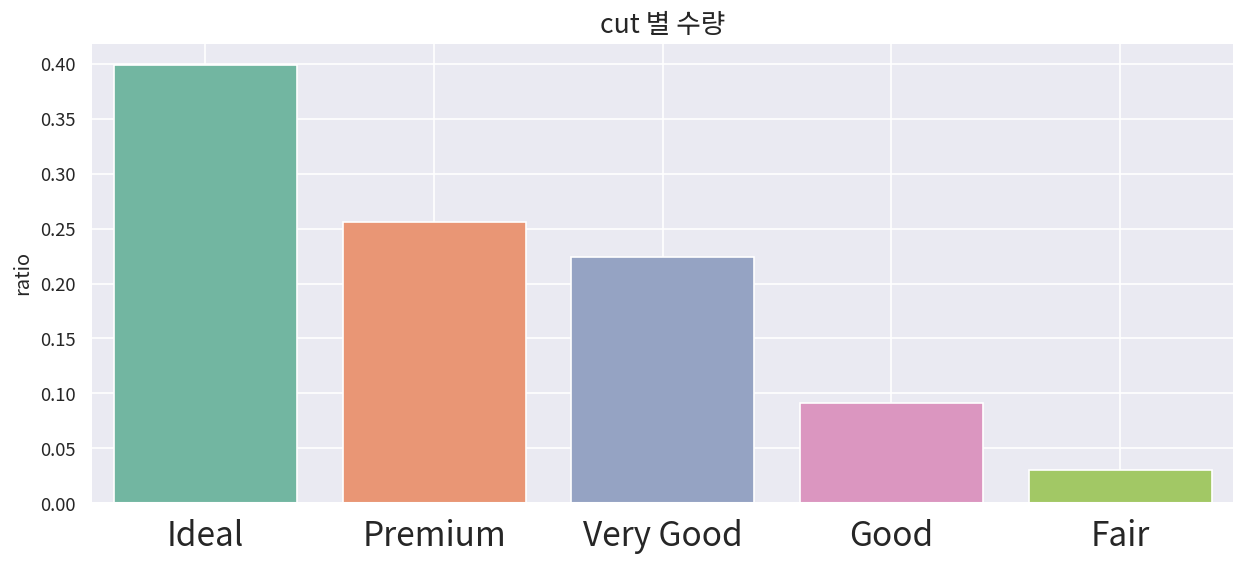

In [9]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 600              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=cut_df,           #사용할 데이터 프레임
    x='cut',        #막대의 카테고리축
    y='ratio',      #요약할 수치 변수  
    palette='Set2'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=20)
ax.set_xlabel('')
ax.set_title('cut 별 수량', fontsize=16, fontweight='bold')

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


<color 의 경우>

In [10]:
color_list = 컬럼타입변경df['color'].unique()

color_counts = []   # 개수 저장 리스트

for color in color_list:
    count = len(컬럼타입변경df.query('color == @color'))
    color_counts.append(count)

# 데이터프레임 생성
color_df = pd.DataFrame({
    'color': color_list,
    'count': color_counts
})

# 전체 개수
total = color_df['count'].sum()

# 비율 추가
color_df['ratio'] = color_df['count'] / total
color_df['percent'] = (color_df['ratio'] * 100).round(2)

color_df
    


,color,count,ratio,percent
0,E,9797,0.181628,18.16
1,I,5422,0.100519,10.05
2,J,2808,0.052058,5.21
3,H,8304,0.153949,15.39
4,F,9542,0.176900,17.69
5,G,11292,0.209344,20.93
6,D,6775,0.125603,12.56


C:\Users\itwill\AppData\Local\Temp\ipykernel_3280\1751062025.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


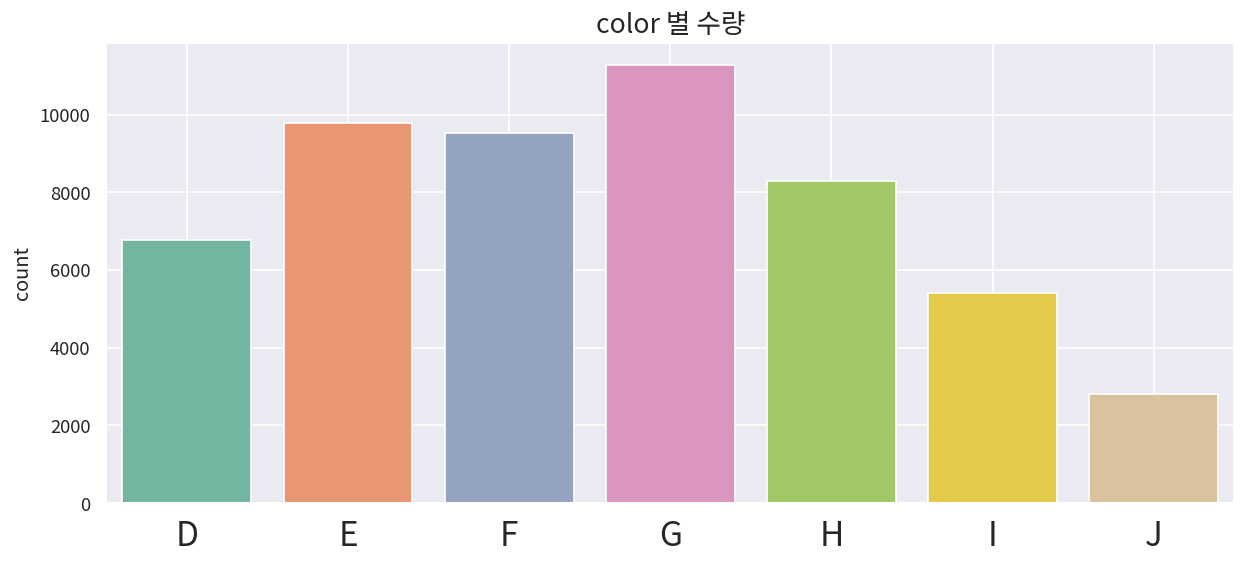

In [11]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 600              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=color_df,           #사용할 데이터 프레임
    x='color',        #막대의 카테고리축
    y='count',      #요약할 수치 변수  
    palette='Set2'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=20)
ax.set_xlabel('')
ax.set_title('color 별 수량', fontsize=16, fontweight='bold')

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


<clarity 의 경우>

In [12]:
clarity_list = 컬럼타입변경df['clarity'].unique()

clarity_counts = []   # 개수 저장 리스트

for clarity in clarity_list:
    count = len(컬럼타입변경df.query('clarity == @clarity'))
    clarity_counts.append(count)

# 데이터프레임 생성
clarity_df = pd.DataFrame({
    'clarity': clarity_list,
    'count': clarity_counts
})

# 전체 개수
total = clarity_df['count'].sum()

# 비율 추가
clarity_df['ratio'] = clarity_df['count'] / total
clarity_df['percent'] = (clarity_df['ratio'] * 100).round(2)

clarity_df


,clarity,count,ratio,percent
0,SI2,9194,0.170449,17.04
1,SI1,13065,0.242214,24.22
2,VS1,8171,0.151483,15.15
3,VS2,12258,0.227253,22.73
4,VVS2,5066,0.093919,9.39
5,VVS1,3655,0.067760,6.78
6,I1,741,0.013737,1.37
7,IF,1790,0.033185,3.32


C:\Users\itwill\AppData\Local\Temp\ipykernel_3280\3701971750.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


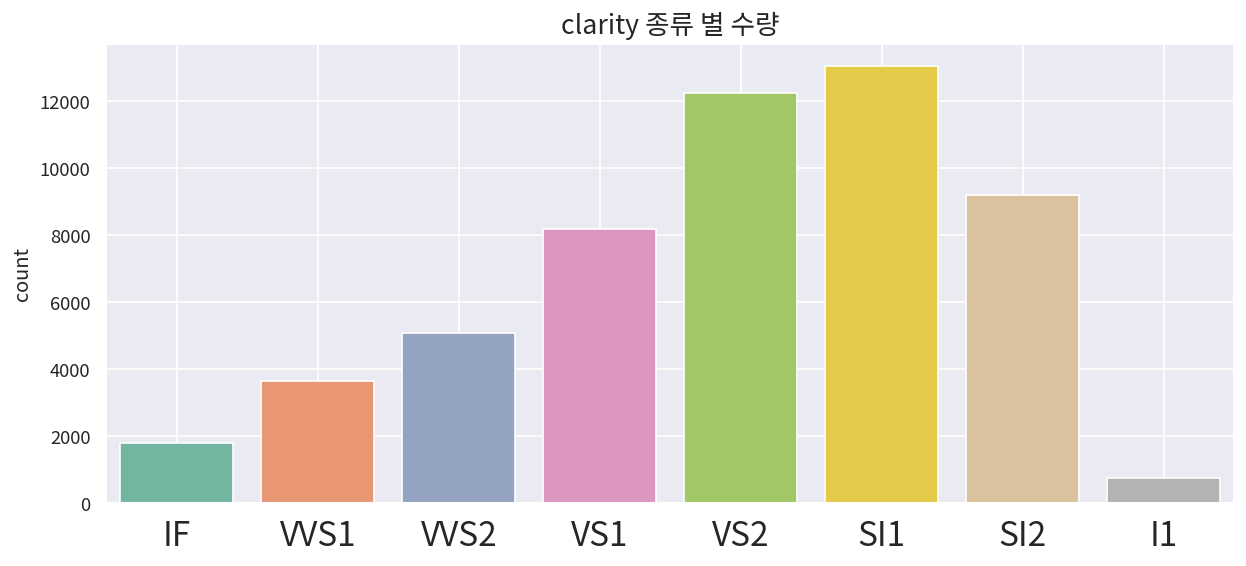

In [13]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 600              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=clarity_df,           #사용할 데이터 프레임
    x='clarity',        #막대의 카테고리축
    y='count',      #요약할 수치 변수  
    palette='Set2'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=20)
ax.set_xlabel('')
ax.set_title('clarity 종류 별 수량', fontsize=16, fontweight='bold')

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


> 데이터 전처리 전의 전반적인 데이터 현황 파악을 위한 boxplot

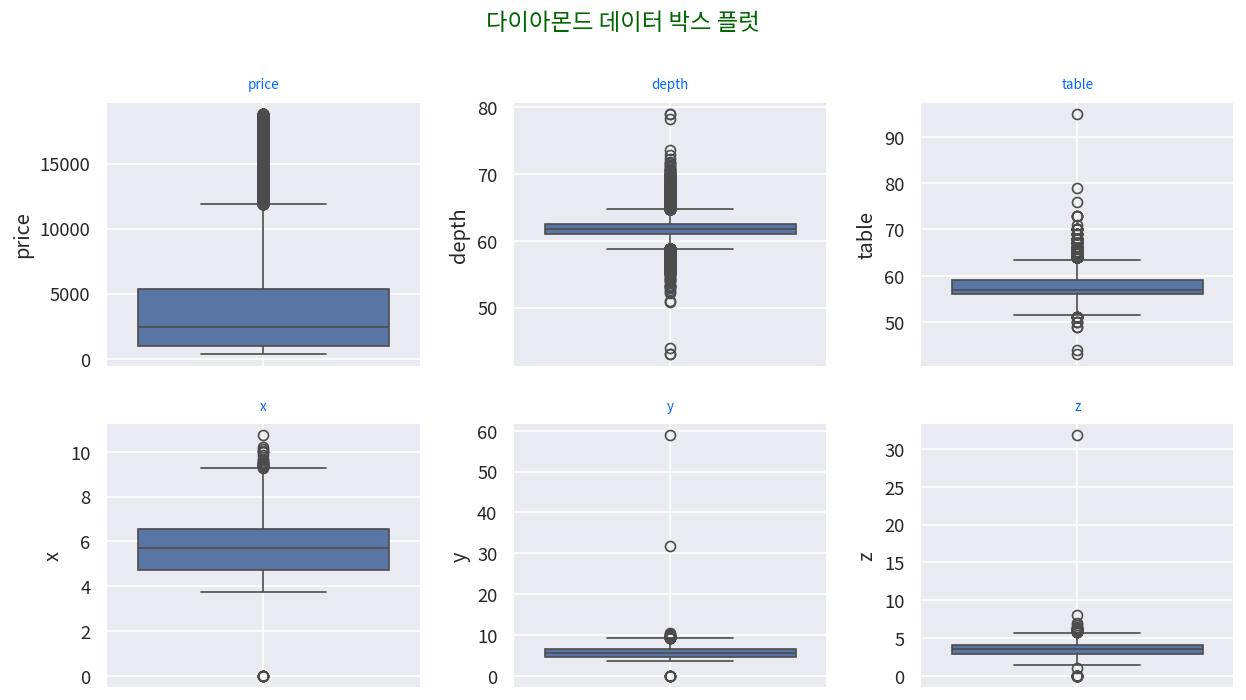

In [14]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 2                     # 그래프 행 수
cols = 3                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=컬럼타입변경df, y='price',ax=ax[0][0])
sb.boxplot(data=컬럼타입변경df, y='depth',ax=ax[0][1])
sb.boxplot(data=컬럼타입변경df, y='table',ax=ax[0][2])


sb.boxplot(data=컬럼타입변경df, y='x',ax=ax[1][0])
sb.boxplot(data=컬럼타입변경df, y='y',ax=ax[1][1])
sb.boxplot(data=컬럼타입변경df, y='z',ax=ax[1][2])


# 3) 그래프 꾸미기

#그래프 전체에 대한 제목
fig.suptitle('다이아몬드 데이터 박스 플럿',fontsize = 14 , color ='#006600')

#각 그래프 간의 가로 (wspace) , 세로 (hspace) 간격 지정
fig.subplots_adjust(wspace=0.2 , hspace=0.2)



# 그래프의 제목, 글자크기, 색상, 격자
ax[0][0].set_title("price", color="#0066ff", fontsize=8, pad=8)
ax[0][0].grid()

ax[0][1].set_title("depth", color="#0066ff", fontsize=8, pad=8)
ax[0][1].grid()


ax[0][2].set_title("table", color="#0066ff", fontsize=8, pad=8)
ax[0][2].grid()

ax[1][0].set_title("x", color="#0066ff", fontsize=8, pad=8)
ax[1][0].grid()

ax[1][1].set_title("y", color="#0066ff", fontsize=8, pad=8)
ax[1][1].grid()

ax[1][2].set_title("z", color="#0066ff", fontsize=8, pad=8)
ax[1][2].grid()



# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


> 0이 있는 행을 찾아 전처리 진행

In [15]:
컬럼타입변경df.eq(0).sum()


price       0
carat       0
cut         0
color       0
clarity     0
x           8
y           7
z          20
depth       0
table       0
dtype: int64

In [16]:
zero_rows = 컬럼타입변경df[컬럼타입변경df.eq(0).any(axis=1)]
zero_columns = 컬럼타입변경df.eq(0).any()

zero_rows, zero_columns


(       price  carat        cut color clarity     x     y    z  depth  table
 2207    3142   1.00    Premium     G     SI2  6.55  6.48  0.0   59.1   59.0
 2314    3167   1.01    Premium     H      I1  6.66  6.60  0.0   58.1   59.0
 4791    3696   1.10    Premium     G     SI2  6.50  6.47  0.0   63.0   59.0
 5471    3837   1.01    Premium     F     SI2  6.50  6.47  0.0   59.2   58.0
 10167   4731   1.50       Good     G      I1  7.15  7.04  0.0   64.0   61.0
 11182   4954   1.07      Ideal     F     SI2  0.00  6.62  0.0   61.6   56.0
 11963   5139   1.00  Very Good     H     VS2  0.00  0.00  0.0   63.3   53.0
 13601   5564   1.15      Ideal     G     VS2  6.88  6.83  0.0   59.2   56.0
 15951   6381   1.14       Fair     G     VS1  0.00  0.00  0.0   57.5   67.0
 24394  12631   2.18    Premium     H     SI2  8.49  8.45  0.0   59.4   61.0
 24520  12800   1.56      Ideal     G     VS2  0.00  0.00  0.0   62.2   54.0
 26123  15397   2.25    Premium     I     SI1  8.52  8.42  0.0   61.3   58.0

> 특정 colore, cut, clarity 에서만 결측치가 발생한 것이 아닌 랜덤으로 발생했다고 판단, 또한 크기가 0 인 경우가 전체의 0.03% 로 단순 제거해도 영향력은 크지 않을 것이라고 판단하여 단순 제거 선택

<이상치 (x,y,z 중 하나라도 0이 있는 경우) drop 결정>

In [17]:
df_clean = 컬럼타입변경df[(컬럼타입변경df[['x','y','z']] != 0).all(axis=1)]
df_clean

,price,carat,cut,color,clarity,x,y,z,depth,table
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,5.75,5.76,3.50,60.8,57.0
53936,2757,0.72,Good,D,SI1,5.69,5.75,3.61,63.1,55.0
53937,2757,0.70,Very Good,D,SI1,5.66,5.68,3.56,62.8,60.0
53938,2757,0.86,Premium,H,SI2,6.15,6.12,3.74,61.0,58.0


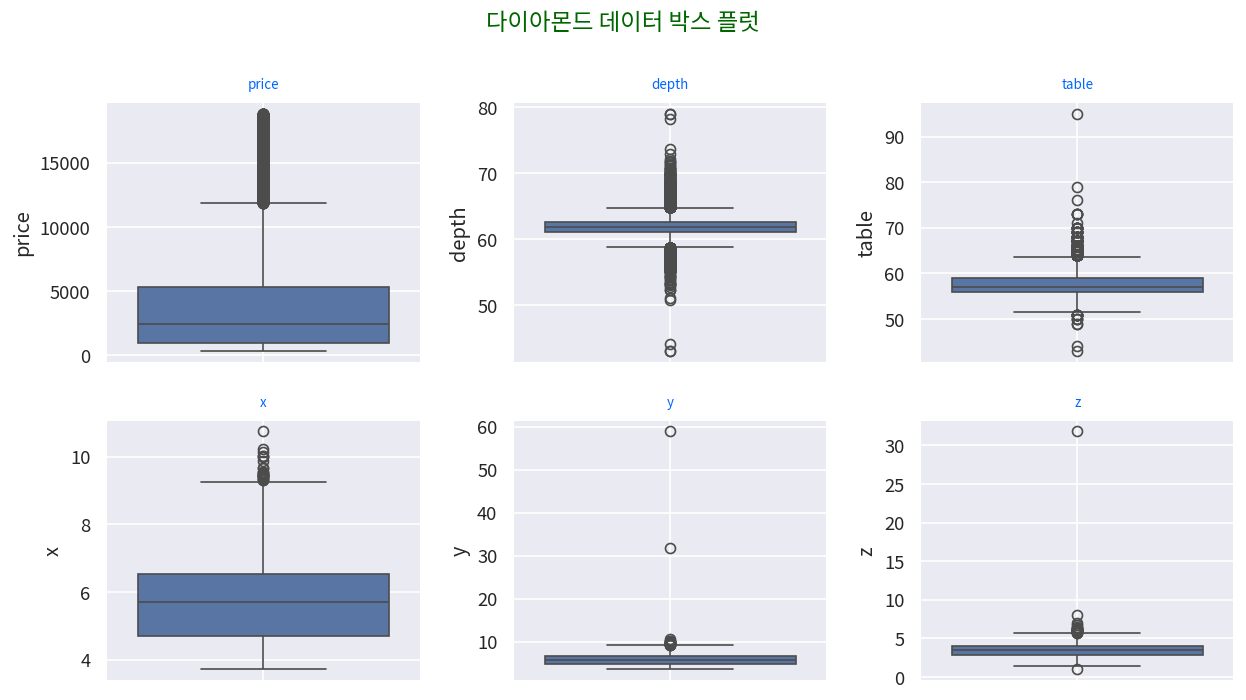

In [18]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 2                     # 그래프 행 수
cols = 3                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=df_clean, y='price',ax=ax[0][0])
sb.boxplot(data=df_clean, y='depth',ax=ax[0][1])
sb.boxplot(data=df_clean, y='table',ax=ax[0][2])


sb.boxplot(data=df_clean, y='x',ax=ax[1][0])
sb.boxplot(data=df_clean, y='y',ax=ax[1][1])
sb.boxplot(data=df_clean, y='z',ax=ax[1][2])


# 3) 그래프 꾸미기

#그래프 전체에 대한 제목
fig.suptitle('다이아몬드 데이터 박스 플럿',fontsize = 14 , color ='#006600')

#각 그래프 간의 가로 (wspace) , 세로 (hspace) 간격 지정
fig.subplots_adjust(wspace=0.2 , hspace=0.2)


# 그래프의 제목, 글자크기, 색상, 격자
ax[0][0].set_title("price", color="#0066ff", fontsize=8, pad=8)
ax[0][0].grid()

ax[0][1].set_title("depth", color="#0066ff", fontsize=8, pad=8)
ax[0][1].grid()


ax[0][2].set_title("table", color="#0066ff", fontsize=8, pad=8)
ax[0][2].grid()

ax[1][0].set_title("x", color="#0066ff", fontsize=8, pad=8)
ax[1][0].grid()

ax[1][1].set_title("y", color="#0066ff", fontsize=8, pad=8)
ax[1][1].grid()

ax[1][2].set_title("z", color="#0066ff", fontsize=8, pad=8)
ax[1][2].grid()



# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


> x,y,z 중 0이 있는 값을 제거한 후의 박스 플럿
> 전체 데이터를 기준으로 조회하면 여전히 이상치들이 다수 확인되었음
> 특히 y 와 z 에서 특정 이상치가 두드러지게 확인되었음 (y, z 가 30이 넘는 경우도 제거 결정)

In [19]:
df_clean2 = df_clean.copy()
df_clean2 = df_clean2[(df_clean2['y'] <= 30) & (df_clean2['z'] <= 30)]
df_clean2.head()


,price,carat,cut,color,clarity,x,y,z,depth,table
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0


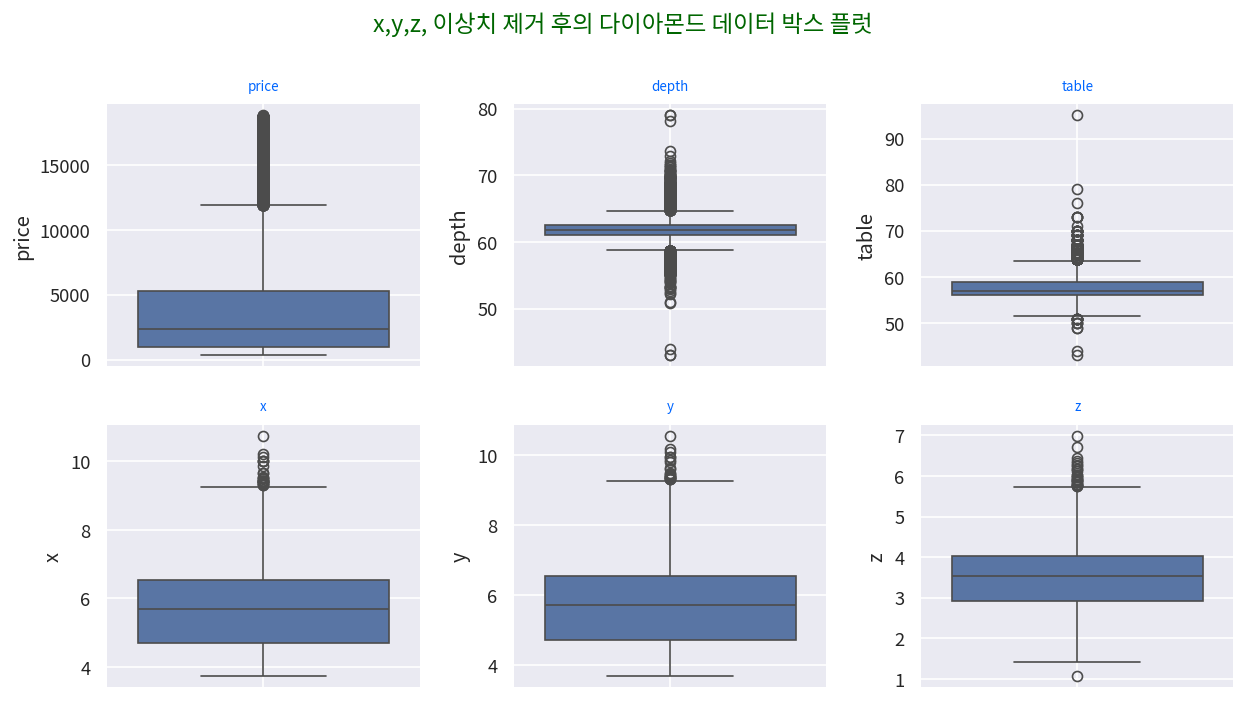

In [50]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 2                     # 그래프 행 수
cols = 3                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=df_clean2, y='price',ax=ax[0][0])
sb.boxplot(data=df_clean2, y='depth',ax=ax[0][1])
sb.boxplot(data=df_clean2, y='table',ax=ax[0][2])


sb.boxplot(data=df_clean2, y='x',ax=ax[1][0])
sb.boxplot(data=df_clean2, y='y',ax=ax[1][1])
sb.boxplot(data=df_clean2, y='z',ax=ax[1][2])


# 3) 그래프 꾸미기

#그래프 전체에 대한 제목
fig.suptitle('x,y,z, 이상치 제거 후의 다이아몬드 데이터 박스 플럿',fontsize = 14 , color ='#006600')

#각 그래프 간의 가로 (wspace) , 세로 (hspace) 간격 지정
fig.subplots_adjust(wspace=0.2 , hspace=0.2)


# 그래프의 제목, 글자크기, 색상, 격자
ax[0][0].set_title("price", color="#0066ff", fontsize=8, pad=8)
ax[0][0].grid()


ax[0][1].set_title("depth", color="#0066ff", fontsize=8, pad=8)
ax[0][1].grid()


ax[0][2].set_title("table", color="#0066ff", fontsize=8, pad=8)
ax[0][2].grid()

ax[1][0].set_title("x", color="#0066ff", fontsize=8, pad=8)
ax[1][0].grid()

ax[1][1].set_title("y", color="#0066ff", fontsize=8, pad=8)
ax[1][1].grid()

ax[1][2].set_title("z", color="#0066ff", fontsize=8, pad=8)
ax[1][2].grid()



# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### 미션 2 가격 데이터는 어떤 모습일까

1. price 변수 분포 확인
   - 낮은 가격대(약 500 ~ 2,000) 구간에 데이터가 집중되어 있다.
   - 가격이 높아질수록 관측치가 급격히 줄어들며,
   - 오른쪽으로 긴 꼬리를 가진 분포(right-skewed) 형태를 보인다.
   - 10,000 이상 고가 구간은 극히 소수로, 이상치(outlier) 성격을 띤다.
   - 다수의 저가 항목과 소수의 고가 항목이 있는 비대칭적인 분포를 띤다.
  
2. carat 변수 분포 확인
   - 0.2 ~ 1.0 캐럿 구간에 관측치가 매우 많이 몰려 있다.
   - 1 캐럿 이상부터는 빈도가 급격히 감소하며,3~5 캐럿 구간은 극히 드물다.
   - 특정 값(0.3, 0.5, 1.0 등) 근처에서 봉우리가 여러 개 나타나는데,
    이는 실제 시장에서 선호되는 캐럿 단위가 존재하기 때문으로 해석할 수 있다.
  

3. price 와 carat 변수 공통점과 차이점 확인
   [공통점]
   - 두 변수 모두 오른쪽으로 치우친 분포
   - 대부분 낮은 값 구간에 집중되어 있고, 극단적으로 큰 이상치가 존재한다
   
   [차이점]
   - price 는 비교적 매끄러운 연속 분포 현태
   - carat 은 특정 값에 수직으로 몰린 다봉형 분포

4. 회귀분석 진행 가능 여부 확인
   > 적절하지 않다
   - 회귀분석은 잔차의 정규성을 가정하는데 현재 비대칭성은 해당 가정을 위반한다
   - 이상치가 다수 확인된다

<price>

In [51]:
df_plot = df_clean2.copy()

> price 데이터 그래프 확인

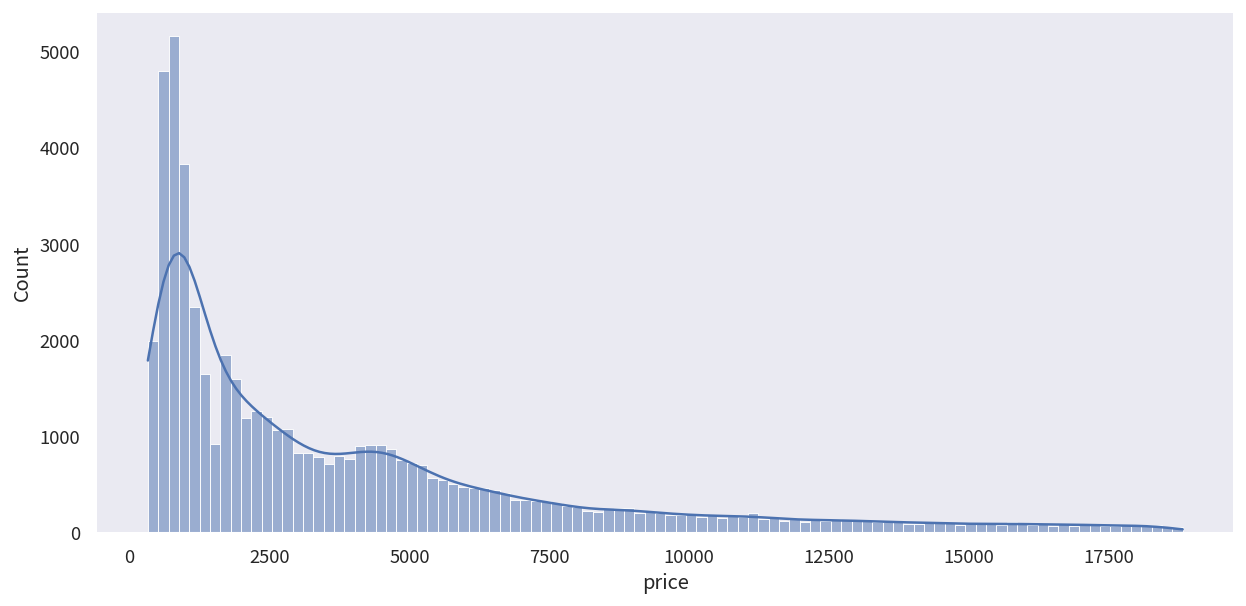

In [52]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.histplot(data=df_plot['price'],bins=100, kde = True)

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

<carat>

> carat 데이터 분포 확인

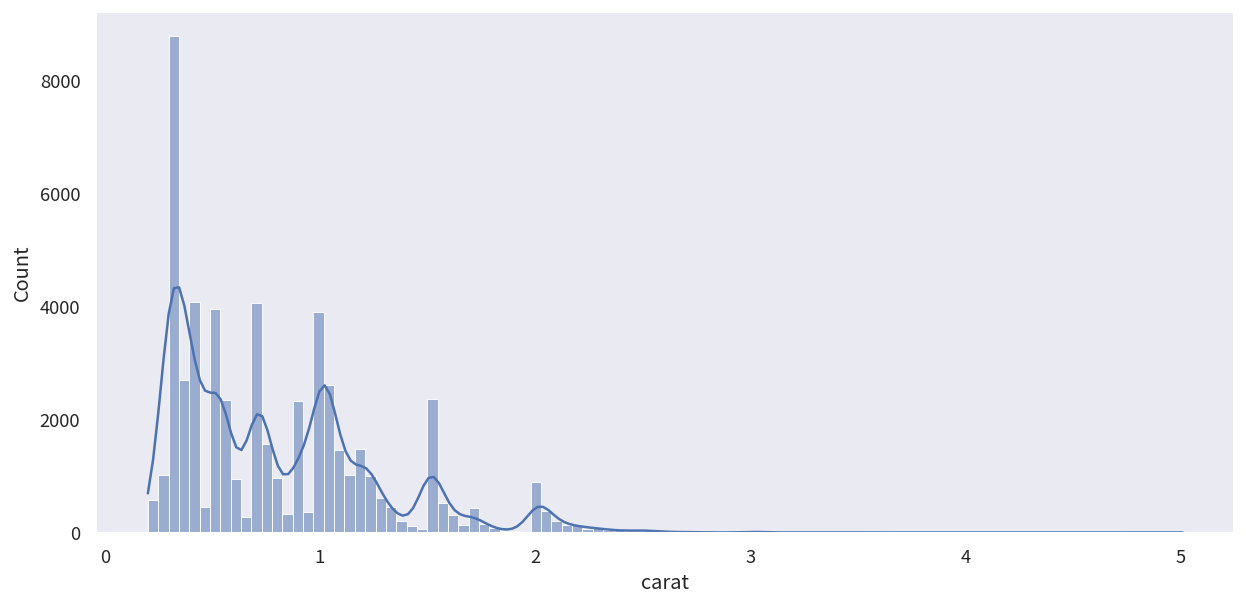

In [26]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=1                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.histplot(data=df_plot['carat'],bins=100, kde = True)

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

### 미션 3. 로그 변환은 왜 등장할까?

1. price 와 carat 변수에 로그 변환을 적용해보고, 변환 전과 후의 분포 비교
   
   [price]
   - 로그 변환 전 price 분포는 낮은 가격대에 관측치가 집중되고, 높은 가격대로 갈수록 빈도가 급격히 감소하는 강한 우측 치우침(right-skewed) 을 보인다.

   - 로그 변환 후에는 분포의 비대칭성이 완화되며,데이터가 보다 넓고 고르게 퍼진 형태로 변화하였다.특히 고가 구간의 극단값 영향이 줄어들어 분포가 더 안정적으로 보인다.

   [carat]
   - 로그 변환 전에는 작은 값에 데이터가 집중된 비대칭 분포를 가진다.
   - 로그 변환 후에는 작은 캐럿 구간이 상대적으로 확장되며,분포의 왜곡이 줄어든 모습을 확인할 수 있다.
   - 다만 carat은 로그 변환 이후에도 완전한 정규분포 형태는 나타나지 않는다.
  
2. 로그 변환을 하면 무엇이 달라지는지, 또 로그 변환의 필요성 설명
   - 로그 변환을 적용하면 큰 값은 압축되고 작은 값은 상대적으로 확대되어 극단값(outlier)의 영향이 완화된다.
   - 분포의 우측 치우침이 줄어들어 보다 대칭적인 형태에 가까워진다.
   - 변수 간 관계가 선형에 가까워져 회귀분석의 가정(정규성, 등분산성) 을 만족할 가능성이 높아진다
   
    따라서 price와 carat처럼 한쪽으로 심하게 치우친 양의 값을 가지는 변수에 대해서는 로그 변환이 분석의 안정성과 해석력을 높이는 데 효과적이다.



In [53]:
import numpy as np
df_log = df_plot.copy()

df_log['log_price'] = np.log1p(df_log['price'])
df_log['log_carat'] = np.log1p(df_log['carat'])


In [ ]:
# log 변환한 데이터셋 확인
df_log

,price,carat,cut,color,clarity,x,y,z,depth,table,log_price,log_carat
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43,61.5,55.0,5.789960,0.207014
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31,59.8,61.0,5.789960,0.190620
2,327,0.23,Good,E,VS1,4.05,4.07,2.31,56.9,65.0,5.793014,0.207014
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63,62.4,58.0,5.814131,0.254642
4,335,0.31,Good,J,SI2,4.34,4.35,2.75,63.3,58.0,5.817111,0.270027
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,5.75,5.76,3.50,60.8,57.0,7.922261,0.542324
53936,2757,0.72,Good,D,SI1,5.69,5.75,3.61,63.1,55.0,7.922261,0.542324
53937,2757,0.70,Very Good,D,SI1,5.66,5.68,3.56,62.8,60.0,7.922261,0.530628
53938,2757,0.86,Premium,H,SI2,6.15,6.12,3.74,61.0,58.0,7.922261,0.620576


> log 변환 전/후의 price의 분포

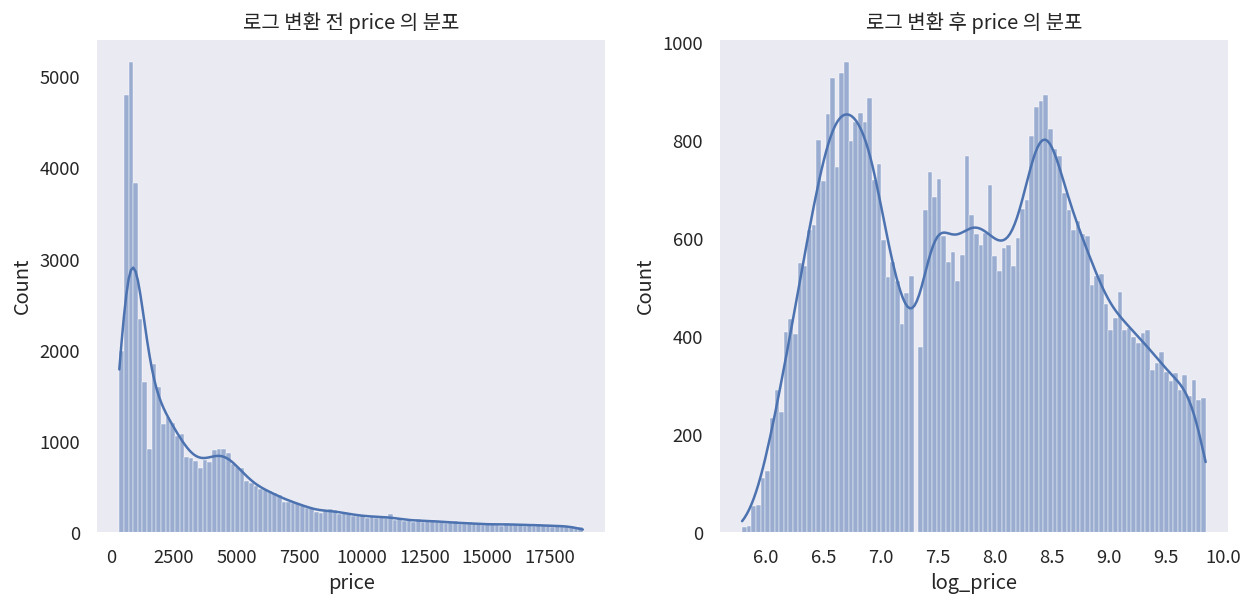

In [57]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=2                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.histplot(data=df_plot['price'],bins=100, kde = True,ax=ax[0])
sb.histplot(data=df_log['log_price'],bins=100, kde = True,ax=ax[1])

ax[0].set_title('로그 변환 전 price 의 분포')
ax[1].set_title('로그 변환 후 price 의 분포')

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

> log 변환 전/후의 carat 분포

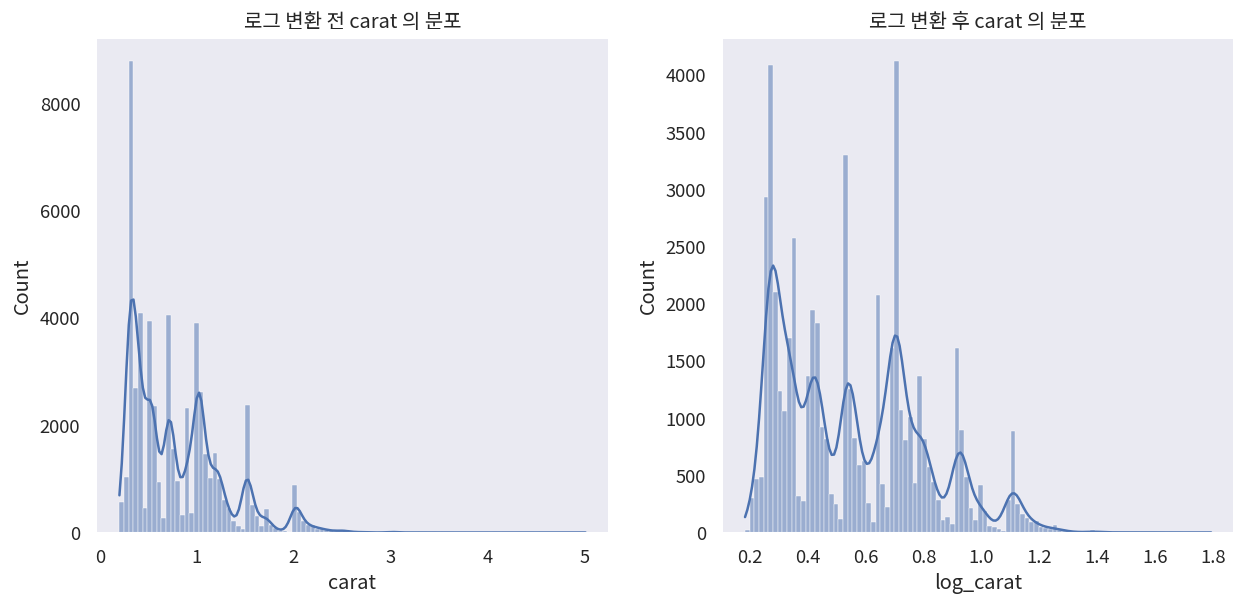

In [58]:
#1) 그래프 초기화 (캔바스 fig 와 도화지 ax 준비하기)
width_px=1280           #그래프 가로 크기
height_px = 640         #그래프 세로 크기
rows=1                  # 도화지 행 수
cols=2                  # 도화지 열 수
figsize =(width_px/my_dpi, height_px/my_dpi)
fig,ax = plt.subplots(rows,cols,figsize=figsize,dpi = my_dpi)


#2) 그래프 그리기 > seaborn 사용
sb.histplot(data=df_plot['carat'],bins=100, kde = True,ax=ax[0])
sb.histplot(data=df_log['log_carat'],bins=100, kde = True,ax=ax[1])

ax[0].set_title('로그 변환 전 carat 의 분포')
ax[1].set_title('로그 변환 후 carat 의 분포')

#3) 출력                        
plt.tight_layout()                    #여백 제거
plt.show()                            #그래프 화면 출력
plt.close()                           #그래프 작업 종료

### 미션 4. 품질 등급은 가격을 얼마나 설명해줄까?

1. cut, color, clarity에 따라 다이아몬드 가격 분포가 어떻게 달라지는지 시각화 진행
   - 각 품질 변수별로 로그 변환된 가격(log_price)의 분포를 박스플롯으로 비교하였다. 중앙값(median), 사분위 범위(IQR), 이상치(outlier)를 중심으로 가격 차이를 관찰하였다.
  
2. 중앙값, 분산, 분포의 겹침 정도를 관찰하며 아래의 질문에 답해보기
   1. 어떤 품질 변수는 가격 차이가 뚜렷한가?
      - color와 clarity 변수가 cut에 비해 그룹 간 가격 차이가 비교적 뚜렷하게 관찰된다
      - color의 경우, 단변량 기준에서는 D → J 등급으로 갈수록 가격의 중앙값이 점진적으로 증가하는 경향이 나타난다.
      - clarity 의 경우 중앙값이 IF → I1 방향으로 대체적으로 증가하는 추이가 관찰된다
      - clarity의 중간 등급(VVS1, VVS2, VS1, VS2)은 서로 가격 분포가 크게 겹쳐 구분이 어렵다.


   2. 어떤 경우에는 등급이 달라도 가격이 크게 겹치는가? 
     - color 변수에서 인접한 등급 간 가격 분포의 겹침이 매우 크게 나타난다.예를 들어 D–E, E–F, G–H 등 인접 등급들은 중앙값 차이가 크지 않고,사분위 범위(IQR)가 서로 겹치는 것으로 관찰된다.
     - cut과 clarity 역시 대부분의 등급 구간에서 가격 분포가 상당 부분 겹치는 것으로 관찰된다


> cut, color, clarity에 따른 다이아몬드 가격 분포 시각화 진행

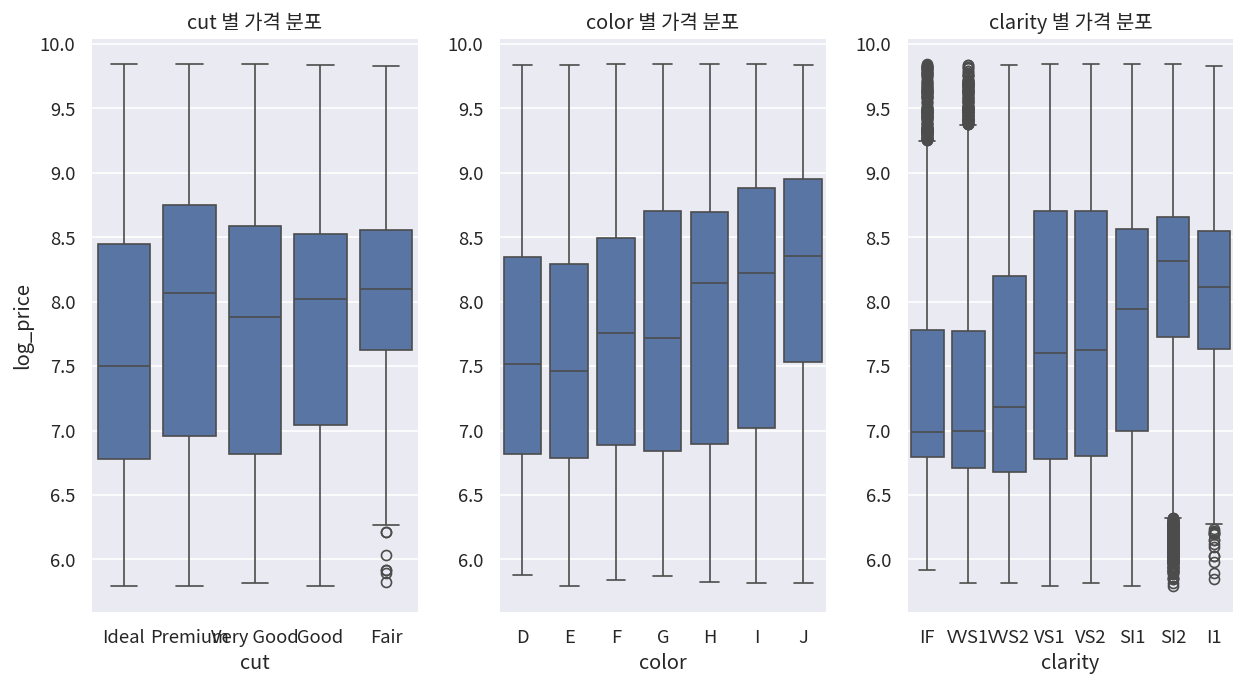

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# 사용할 데이터프레임와 컬럼 이름 (log_price 기준으로 예시)
df = df_log   
y_col = 'log_price'       

width_px  = 1280
height_px = 720
figsize   = (width_px / my_dpi, height_px / my_dpi)

fig, axes = plt.subplots(1, 3, figsize=figsize, dpi=my_dpi)

# 1) cut vs price
sns.boxplot(data=df_log, x='cut', y=y_col, ax=axes[0])
axes[0].set_title('cut 별 가격 분포')
axes[0].set_xlabel('cut')
axes[0].set_ylabel(y_col)

# 2) color vs price
sns.boxplot(data=df_log, x='color', y=y_col, ax=axes[1])
axes[1].set_title('color 별 가격 분포')
axes[1].set_xlabel('color')
axes[1].set_ylabel('')

# 3) clarity vs price
sns.boxplot(data=df_log, x='clarity', y=y_col, ax=axes[2])
axes[2].set_title('clarity 별 가격 분포')
axes[2].set_xlabel('clarity')
axes[2].set_ylabel('')

for ax in axes:
    ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


### 미션 5 'Premium 컷은 정말 더 비쌀까?"

1. Premium 컷 다이아몬드가 Ideal 컷 보다 평균 가격이 높을지 직접 가설을 세우고, 적절한 검정 방법을 선정하여 수행하자
   
[가설 설정]
H0: Premium 컷 다이아몬드의 가격 분포는 Ideal 컷 다이아몬드의 가격 분포보다
    전반적으로 크지 않다.

H1: Premium 컷 다이아몬드의 가격 분포는 Ideal 컷 다이아몬드의 가격 분포보다
    전반적으로 더 큰 값을 가진다.


[작업 순서]
1. 분석에 필요한 변수(cut, log_price)를 추출하여 데이터를 정리한다.
2. 히스토그램과 커널 밀도 함수 등을 통해 두 집단(Ideal, Premium)의 가격 분포 양상을 시각적으로 확인한다.
3. 각 집단의 log_price에 대해 정규성을 검정하고, 두 집단 간 등분산성을 통계적으로 검정한다.
4. 그 결과, Ideal과 Premium 집단 모두 정규분포 가정을 충족하지 않으며, 두 집단 간 분산 또한 동일하지 않은 것으로 확인되었다.
5. 이에 따라 모수적 평균 비교 검정보다는 비모수적 검정이 적절하다고 판단하여 Mann–Whitney U test를 사용하였다.
   Mann–Whitney U test는 두 집단의 평균 차이를 직접 검정하지는 않지만, 한 집단의 분포가 다른 집단보다 전반적으로 더 높은 위치에 있는지를 통계적으로 비교할 수 있는 비모수적 방법이다.

[결론]  
1. p_value 가 2.10 × 10⁻¹⁶⁵ 로 확인되어 귀무 가설을 기각하고, 대립가설을  채택한다. 결론적으로 Premium 컷 다이아몬드의 가격 분포는 Ideal 컷 다이아몬드의 가격 분포보다 전반적으로 더 큰 값을 가진다고 할 수 있다

2. LLM을 활용해 추가적으로 탐색한 결과, 비모수적 검정의 효과 크기를 확인하는 지표로 Cliff’s delta를 활용하였다.

Cliff’s delta 값은 0.17로 나타났으며, 이는 두 집단 간 가격 분포 차이가 통계적으로는 유의하지만, 효과 크기 측면에서는 작은(small) 수준의 차이에 해당함을 시사한다.


- 필요한 데이터만 가져온다

In [62]:
df_log.filter(['cut', 'log_price'])


# 1) color와 log_price만 먼저 가져오기 (원하면 생략해도 됨)
tmp = df_log[['cut', 'log_price']].copy()

# 2) color 안에서 순번 붙이기 (0,1,2,...)
tmp['idx'] = tmp.groupby('cut').cumcount()

# 3) idx를 행, color를 열로 pivot
df_wide = tmp.pivot(index='idx', columns='cut', values='log_price')

df_wide.head(10)


C:\Users\itwill\AppData\Local\Temp\ipykernel_3280\3986597156.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp['idx'] = tmp.groupby('cut').cumcount()


cut,Ideal,Premium,Very Good,Good,Fair
idx,,,,,
0,5.789960,5.789960,5.820083,5.793014,5.823046
1,5.831882,5.814131,5.820083,5.817111,7.922261
2,5.843544,5.837730,5.823046,5.828946,7.922986
3,5.855072,5.846439,5.826000,5.863631,7.924072
4,6.001415,5.846439,5.863631,5.863631,7.924072
5,6.001415,5.874931,5.866468,5.863631,7.924434
6,6.001415,6.001415,5.869297,5.998937,7.924434
7,6.003887,6.003887,5.869297,5.998937,7.929487
8,6.003887,6.003887,5.869297,5.998937,7.931285


> Ideal 과 Premium 집단의 분포 확인

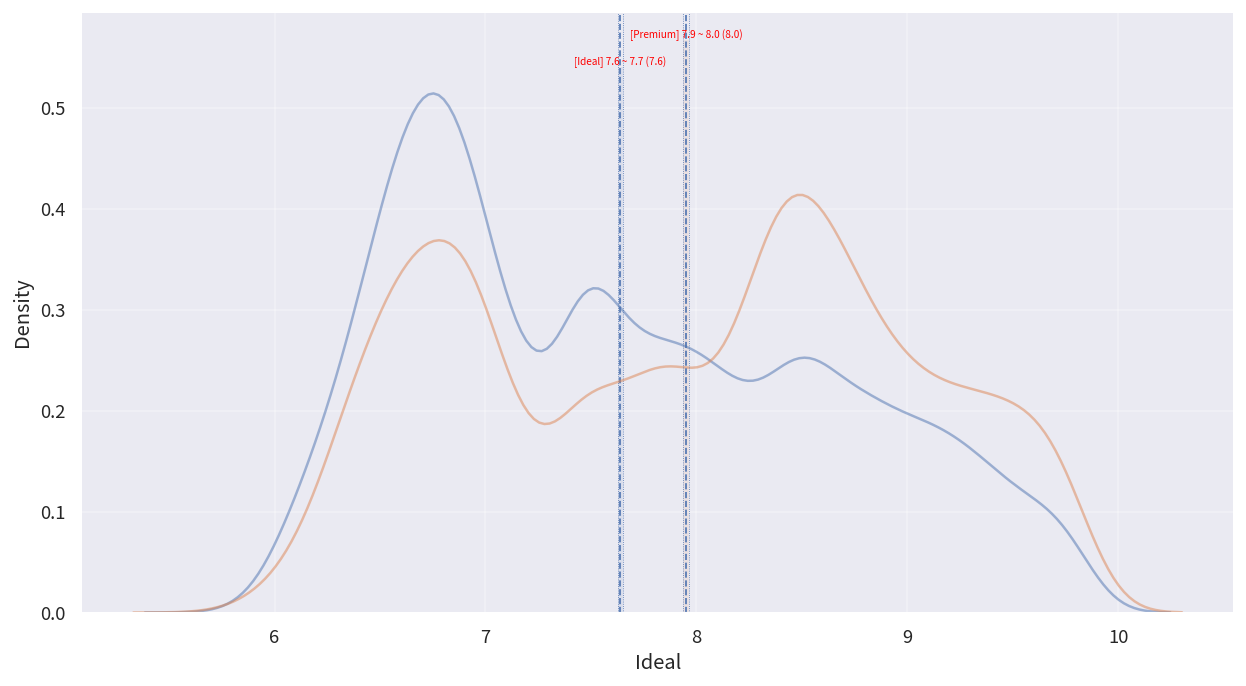

In [34]:
data = df_wide[['Ideal','Premium']]                # 확인할 데이터

# 1) 그래프 초기화
width_px  = 1280                      # 그래프 가로 크기
height_px = 720                       # 그래프 세로 크기
rows = 1                              # 그래프 행 수
cols = 1                              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for c in data.columns:
    # KDE Plot 그리기
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    # 신뢰구간
    max = data[c].max()               # 최대값
    clevel = 0.95                     # 신뢰수준
    dof = len(data[c]) - 1            # 자유도
    sp_mean = data[c].mean()          # 표본평균
    sp_std = data[c].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(data[c]))  # 표본표준오차

    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax.text(x=(cmax-cmin)/2+cmin,
            y=ymax,
            s=f"[{c}] {cmin:.1f} ~ {cmax:.1f} ({sp_mean:.1f})",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontdict={"size": 6, "color": "red"})

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료


> 두 그룹의 커널 밀도 함수 그래프 모양이 정규분포를 띄고 있지 않으며, 두 그룹의 분포는 상이하다. 

> Ideal 과 Premium 의 정규성과 등분산성 검정

In [71]:
data = df_wide[['Ideal','Premium']]                      # 검사하려는 데이터 추출

# 0) NaN 제거된 데이터 따로 만들기
clean = {c: data[c].dropna() for c in data.columns}

equal_var_fields = []
normal_dist = True
report = []

# 1) 각 컬럼 정규성 검정
for c in clean.keys():
    s, p = normaltest(clean[c])   # NaN 제거된 시리즈 사용

    normalize = p > 0.05
    report.append({
        "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })
    normal_dist = normal_dist and normalize

# 2) 변수가 두 개 이상인 경우 등분산성 확인
if len(clean.keys()) > 1:
    # 모든 컬럼 데이터를 리스트로 모음 (각각 NaN 제거됨)
    arrays = [clean[c].values for c in clean.keys()]

    if normal_dist:
        n = "Bartlett"                      # 정규성을 충족할 경우의 검정방법
        s, p = bartlett(*arrays)
    else:
        n = "Levene"                        # 정규성을 충족하지 않을 경우의 검정방법
        s, p = levene(*arrays, center='median')

    report.append({
        "field": n,
        "statistic": s,
        "p-value": p,
        "result": p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df


,statistic,p-value,result
field,,,
Ideal,4627.175831,0.000000e+00,False
Premium,9974.910131,0.000000e+00,False
Levene,72.986244,1.357048e-17,False


> 정규성과 등분산성 검정 결과, 두 집단 모두 정규분포를 따르지 않고
분산도 동일하지 않아 독립표본 t-test의 전제조건을 충족하지 못하였다.
따라서 평균 차이 검정 대신, 분포의 위치 차이를 비교하는
비모수 검정인 Mann–Whitney U-test를 사용하였다.

> Mann–Whitney U test는 두 집단의 평균 차이를 직접 검정하지는 않지만,
한 집단의 분포가 다른 집단보다 전반적으로 더 높은 위치에 있는지를
통계적으로 비교할 수 있는 비모수적 방법이다.


In [69]:
df_wide.head()

cut,Ideal,Premium,Very Good,Good,Fair
idx,,,,,
0,5.789960,5.789960,5.820083,5.793014,5.823046
1,5.831882,5.814131,5.820083,5.817111,7.922261
2,5.843544,5.837730,5.823046,5.828946,7.922986
3,5.855072,5.846439,5.826000,5.863631,7.924072
4,6.001415,5.846439,5.863631,5.863631,7.924072


In [70]:
premium = df_log.loc[df_log['cut'] == 'Premium', 'log_price']
ideal   = df_log.loc[df_log['cut'] == 'Ideal', 'log_price']


stat, p = mannwhitneyu(premium, ideal, alternative='greater')
print("U statistic:", stat)
print("p-value:", p)


U statistic: 174049707.5
p-value: 2.1040669289325004e-165


귀무가설(H0)
Premium 컷 다이아몬드의 가격 분포가
Ideal 컷 다이아몬드의 가격 분포보다 전반적으로 크지 않다.

대립가설(H1)
Premium 컷 다이아몬드의 가격 분포가
Ideal 컷 다이아몬드의 가격 분포보다 전반적으로 더 크다.


> p_value 가 2.10 × 10⁻¹⁶⁵ 로 확인되어 귀무 가설을 기각하고, 대립가설을  채택한다.
> 결론적으로 Premium 컷 다이아몬드의 가격 분포는 Ideal 컷 다이아몬드의 가격 분포보다 전반적으로 더 큰 값을 가진다고 할 수 있다


> LLM 을 활용해 추가적으로 탐색해본 결과, 비모수적 검정의 효과를 확인할 떄 사용할 수 있는 값으로 Cliff’s delta 가 있어 활용하였다.

In [72]:
def cliffs_delta(x, y):
    nx, ny = len(x), len(y)
    gt = sum(xi > yi for xi in x for yi in y)
    lt = sum(xi < yi for xi in x for yi in y)
    return (gt - lt) / (nx * ny)


In [74]:
delta = cliffs_delta(premium.values, ideal.values)
delta


np.float64(0.17246201535821387)

### 미션 6. 모든 컷은 서로 다를까?
1. cut 에 따른 가격 차이가 전반적으로 존재하는지 분산분석으로 살펴보자

   1. 각 cut 별로 kde plot 을 시각화 하여 분포를 시각적으로 확인한다.
   2. 각 집단에 대해 정규성을 검정하고, 두 집단 간 등분산성을 통계적으로 검정한다.
   3. 그 결과, Fair 집단만 정규성 검정을 통과하였고, 그 외 모든 집단은 정규성을 충족하지 않았다. 또한 Levene 검정을 통해 등분산성이 충족되지 않는 것을 확인했다.
   4. 하여, Welch ANOVA 를 수행한다
      (정규성과 등분산성 충족되지 않지만, 표본의 수가 매우 크기 떄문에 중심극한정리에 의해 평균의 분포는 정규분포에 근사하게 된다.)

   > Welch ANOVA 결과, cut에 따른 다이아몬드의 평균 log_price는 통계적으로 유의한 차이를 보였다(F = 273.80, p < 0.001). 그러나 효과 크기(np² = 0.018)를 함께 고려하면, cut이 가격 변동을 설명하는 비중은 약 1.8%로 비교적 작은 수준에 해당한다. 이는 통계적으로는 유의하지만 실질적인 차이는 제한적일 수 있음을 시사한다.

2. 차이가 존재한다면 어떤 컷들 사이에서 차이가 발생하는지 사후 검정을 진행해보자
   1. 이분산 검정에 적합한 Games Howell 사후 검정을 실시하여 cut 그룹간의 차이를 확인한다
   2. 





<데이터 분포 확인>

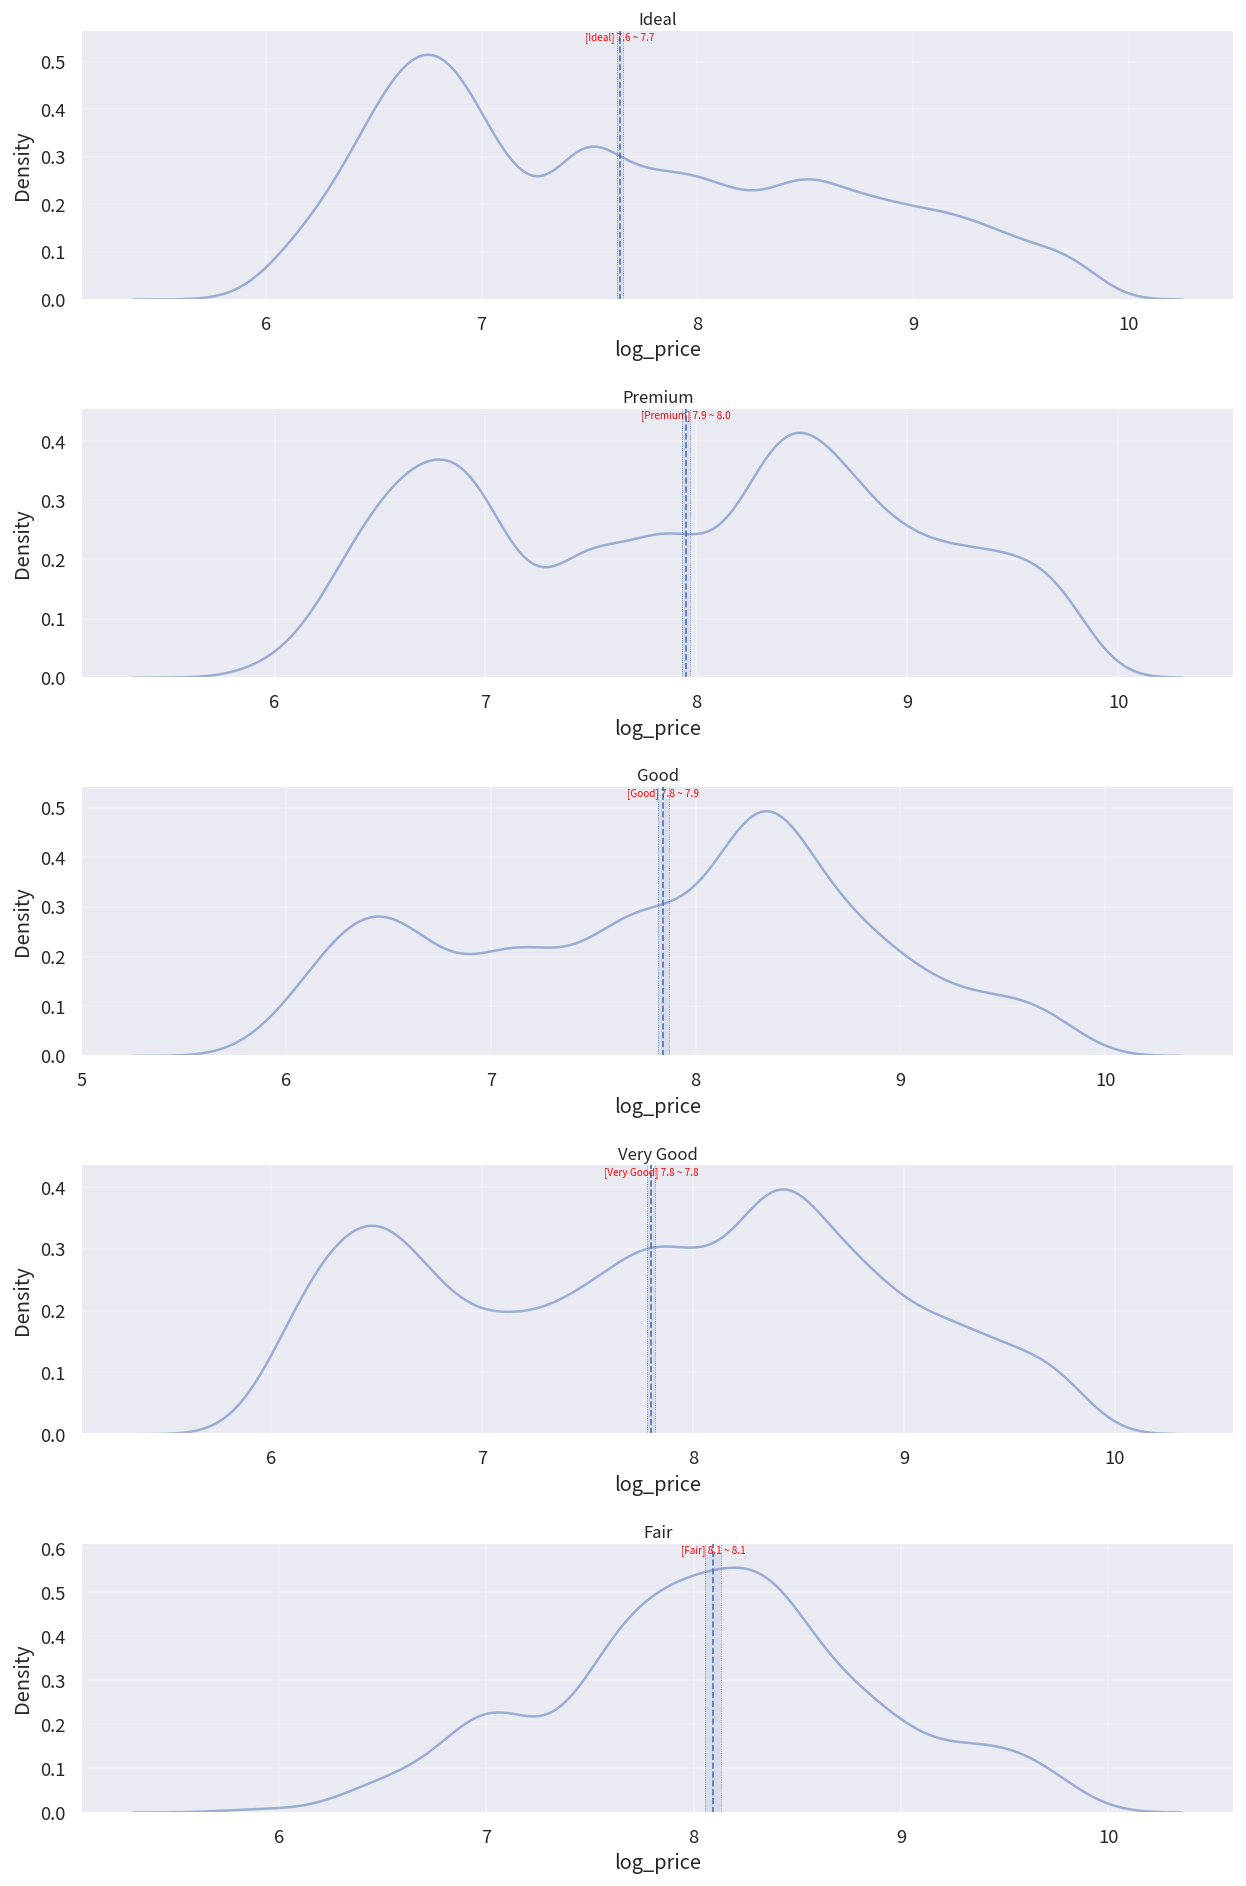

In [39]:
# 확인할 데이터 필드
field = 'log_price'

# 집단을 구분하는 필드(hue)
hue_field = 'cut'

# 요일 종류 구하기
hue_values = df_log[hue_field].unique()
hue_count = len(hue_values)

# 1) 그래프 초기화
width_px  = 1280      # 그래프 가로 크기
height_px = 640 * 3   # 그래프 세로 크기
rows = 5              # 그래프 행 수
cols = 1              # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

for i, v in enumerate(hue_values):

    temp = df_log[df_log[hue_field] == v]
    #display(temp)

    # KDE Plot 그리기
    sb.kdeplot(data=temp, x=field, fill=False, alpha=0.5, ax=ax[i])
    ax[i].grid(True, alpha=0.3)
    ax[i].set_title(v, fontsize=10, pad=3)

    # 신뢰구간
    max = temp[field].max()               # 최대값
    clevel = 0.95                         # 신뢰수준
    dof = len(temp[field]) - 1            # 자유도
    sp_mean = temp[field].mean()          # 표본평균
    sp_std = temp[field].std(ddof=1)      # 표본표준편차
    sp_std_error = sp_std / sqrt(len(temp[field]))   # 표본표준오차

    cmin, cmax = t.interval(
        clevel, dof,
        loc=sp_mean,
        scale=sp_std_error
    )

    ax[i].axvline(cmin, linestyle=':', linewidth=0.5)
    ax[i].axvline(cmax, linestyle=':', linewidth=0.5)

    # 평균 표시
    ymin, ymax = ax[i].get_ylim()
    ax[i].fill_between(
        (cmin, cmax), 0, ymax, alpha=0.1
    )
    ax[i].axvline(sp_mean, linestyle='--', linewidth=1)

    # 텍스트 그리기
    ax[i].text(
        x=(cmax - cmin)/2 + cmin,
        y=ymax,
        s=f"[{v}] {cmin:.1f} ~ {cmax:.1f}",
        horizontalalignment="center",
        verticalalignment="bottom",
        fontdict={"size": 6, "color": "red"}
    )

# 4) 출력
plt.tight_layout()     # 여백 제거
plt.show()             # 그래프 화면 출력
plt.close()            # 그래프 작업 종료


<정규성 등분산성 검정>

In [40]:
# 요일별 그룹 생성
groups = [(name, grp['log_price']) for name, grp in df_log.groupby('cut')]

report = []
normal_dist = True

for name, series in groups:
    stat, p = normaltest(series)
    ok = p > 0.05
    report.append({
        "field": name,
        "statistic": stat,
        "p-value": p,
        "result": ok
    })
    normal_dist = normal_dist and ok


# 등분산성 검정 선택
if normal_dist:
    test_name = "Bartlett"
    stat, p = bartlett(*[s.values for _, s in groups])
else:
    test_name = "Levene"
    stat, p = levene(*[s.values for _, s in groups], center='median')

equal_var = p > 0.05

report.append({
    "field": test_name,
    "statistic": stat,
    "p-value": p,
    "result": equal_var
})

report_df = DataFrame(report).set_index('field')
report_df


C:\Users\itwill\AppData\Local\Temp\ipykernel_3280\1786301501.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [(name, grp['log_price']) for name, grp in df_log.groupby('cut')]


,statistic,p-value,result
field,,,
Ideal,4625.405836,0.000000e+00,False
Premium,9974.910131,0.000000e+00,False
Very Good,4705.594475,0.000000e+00,False
Good,710.350733,5.614333e-155,False
Fair,5.590556,6.109789e-02,True
Levene,122.552036,2.635579e-104,False


> 정규성과 등분산성 충족되지 않지만, 표본의 수가 매우 크기 떄문에 중심극한정리에 의해 평균의 분포는 정규분포에 근사하게 된다. Welch ANOVA 검정을 수행한다


In [41]:
if equal_var :
  pg_anova = anova (data = df_log , dv='log_price',between ='cut')

else :
  pg_anova = welch_anova(data = df_log , dv = 'log_price' , between ='cut')

pg_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,cut,4,9549.055445,273.801562,3.537749e-223,0.018074


In [42]:
f_val = pg_anova['F'].iloc[0]
p_val = pg_anova['p-unc'].iloc[0]
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(f_val, p_val, "대립" if p_val <= 0.05 else "귀무")

'statistic: 273.802, p-value: 0.000, 대립가설 채택'

> Welch ANOVA 결과, cut에 따른 다이아몬드의 평균 log_price는 통계적으로 유의한 차이를 보였다(F = 273.80, p < 0.001). 그러나 효과 크기(np² = 0.018)를 함께 고려하면, cut이 가격 변동을 설명하는 비중은 약 1.8%로 비교적 작은 수준에 해당한다. 이는 통계적으로는 유의하지만 실질적인 차이는 제한적일 수 있음을 시사한다.

<사후검정>

In [43]:
if equal_var:
    print ('=== Tukey HSD ===')
    hoc_df = pairwise_tukey(data=df_log , dv='log_price', between='cut')

else:
    print("=== Games-Howell ===")
    hoc_df = pairwise_gameshowell(df_log, dv='log_price', between='cut')
hoc_df


=== Games-Howell ===


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Ideal,Premium,7.640019,7.950465,-0.310446,0.011070,-28.044544,28556.391397,0.000000e+00,-0.308412
1,Ideal,Very Good,7.640019,7.799276,-0.159257,0.011603,-13.725895,24097.912460,0.000000e+00,-0.157964
2,Ideal,Good,7.640019,7.842975,-0.202956,0.015554,-13.048607,7355.097656,0.000000e+00,-0.205053
3,Ideal,Fair,7.640019,8.093436,-0.453417,0.020256,-22.384803,2033.394406,0.000000e+00,-0.463716
4,Premium,Very Good,7.950465,7.799276,0.151189,0.012879,11.739134,25369.177646,0.000000e+00,0.146381
5,Premium,Good,7.950465,7.842975,0.107489,0.016528,6.503513,9001.772178,8.255949e-10,0.105705
6,Premium,Fair,7.950465,8.093436,-0.142971,0.021013,-6.804023,2345.500699,1.290191e-10,-0.142248
7,Very Good,Good,7.799276,7.842975,-0.043699,0.016889,-2.587382,9554.948807,7.273680e-02,-0.042800
8,Very Good,Fair,7.799276,8.093436,-0.294160,0.021298,-13.811416,2468.907365,0.000000e+00,-0.291594
9,Good,Fair,7.842975,8.093436,-0.250461,0.023684,-10.575209,3474.676176,1.285749e-12,-0.268583


- cut 집단간의 비교에서 Very Good 과 Good의 평균 차이는 통계적으로 유의하지 않았다 (7.273680e-02)
- 그 외의 집단간의 평균 차이는 통계적으로 유의했다
- 각 집단들을 비교했을 떄, 가격의 순위는 Fair > Premium > Good > Very Good > Ideal 로 확인된다
- 주요 조합들에서 대부분 p_value 가 0.001 보다 작은 수준이므로 cut 그룹 간의 차이는 우연에 의해 발생했을 가능성이 낮은 것으로 판단된다
- 효과 크기를 고려했을 떄 (Hedges' g) 대부분 0.15~0.46 수준


✔ Fair > Premium > Very Good ≈ Good > Ideal
가격은 이렇게 증가하는 경향이 있는 것으로 보임.

✔ 모든 조합에서 p-value가 매우 작음 (거의 0)

→ 그룹 간 가격 차이가 통계적으로 매우 유의함
→ 우연으로 발생했을 가능성 거의 0%

✔ hedges g(효과크기)는 대부분 0.15~0.46 수준

→ “작은~중간~큰 효과” 범위까지 존재
→ 단순히 통계적으로만 유의한 것이 아니라
실제로도 충분히 의미 있는 가격 차이가 존재함

# 미션 7. 품질 요인들은 서로 영향을 주고 받을까? 

컷(cut)과 색(color), 혹은 컷과 투명도(clarity)를 함께 고려하면 가격 구조가 달라질까?

이원 분산분석을 통해 
- 각각의 요인이 가격에 미치는 영향
- 두 요인이 함께 작용할 때의 효과 를 구분해 보
자.

결과를 해석할 때는 “상호작용이 있다/없다”를 넘어 그 의미가 무엇인지를 설명해 보자.

<컷과 색>

- 컷 별 색에 따른 가격 비교

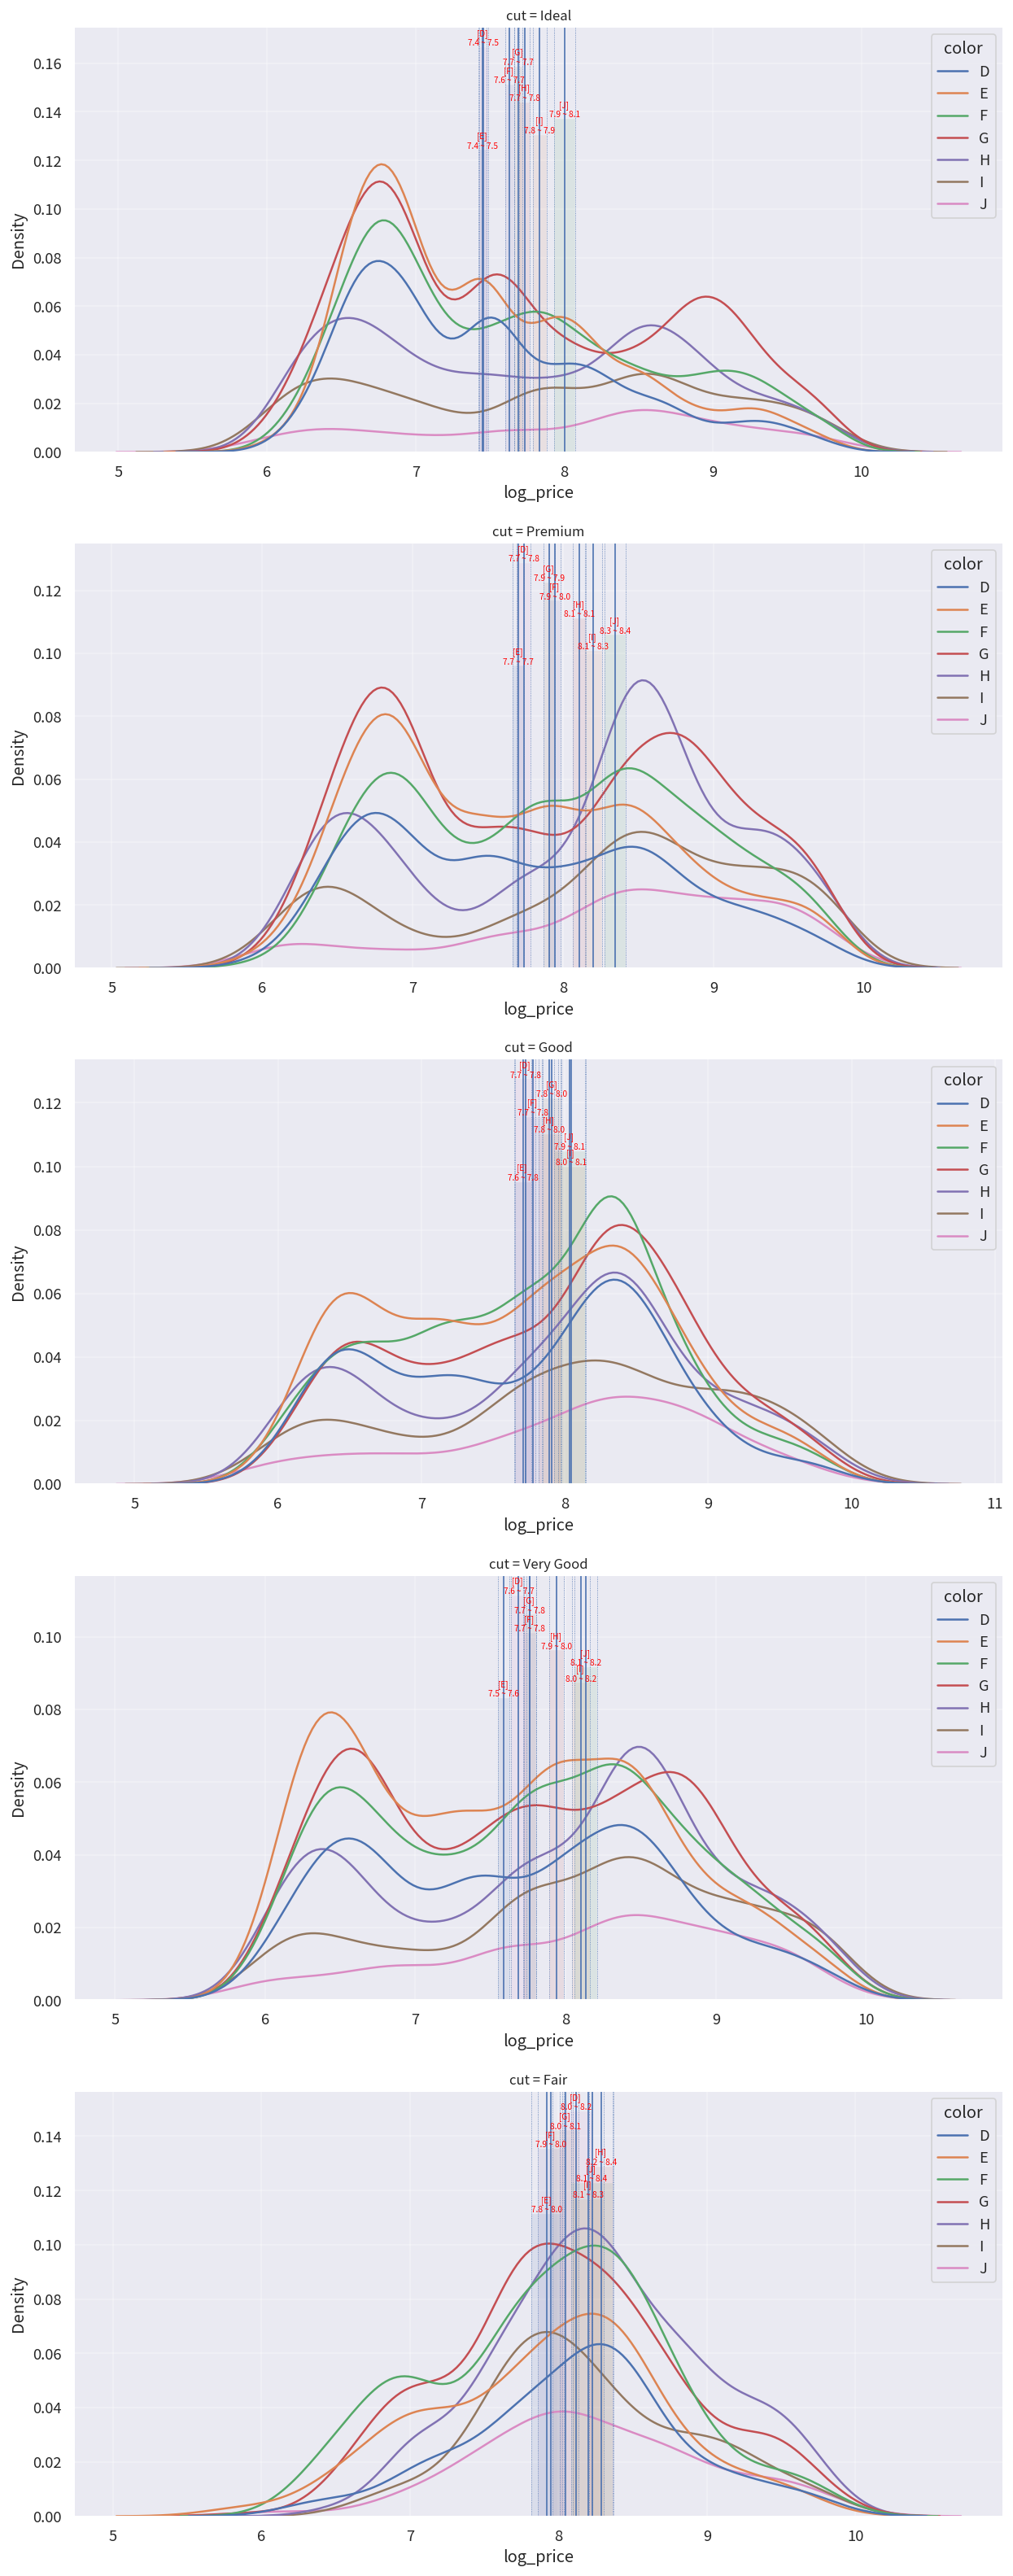

In [44]:
field = 'log_price'
group_field = 'cut'
hue_field = 'color'

# 시각화 할 필드만 원본 데이터에서 추출
data = df_log[[field, group_field, hue_field]]

group_values = data[group_field].unique()
group_count = len(group_values)
hue_values = data[hue_field].unique()

# 1) 그래프 초기화
rows = group_count                  # 그래프 행 수
cols = 1 # 그래프 열 수
width_px  = 1280 * cols             # 그래프 가로 크기
height_px = 640* rows              # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

# ax 객체가 행,열 수에 따라서 리스트가 된다.
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기
for i, v in enumerate(group_values):
    temp = data[data[group_field] == v]
    sb.kdeplot(data=temp, x=field, hue=hue_field, ax=ax[i])
    ax[i].grid(True, alpha=0.3)
    ax[i].set_title('{0} = {1}'.format(group_field, v), fontsize=10, pad=5)

    for h in hue_values:
        temp_sub = temp[temp[hue_field] == h]
        
        # 신뢰구간
        max = temp_sub[field].max()                         # 최대값
        clevel = 0.95 # 신뢰수준
        dof = len(temp_sub[field]) -1 # 자유도
        sp_mean = temp_sub[field].mean()                    # 표본평균
        sp_std = temp_sub[field].std(ddof=1)                # 표본표준편차
        sp_std_error = sp_std / sqrt(len(temp_sub[field]))  # 표본표준오차
        
        cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)
        
        ax[i].axvline(cmin, linestyle=':', linewidth=0.5)
        ax[i].axvline(cmax, linestyle=':', linewidth=0.5)
        
        # 평균 표시
        ymin, ymax = ax[i].get_ylim()
        ax[i].fill_between([cmin, cmax], 0, ymax, alpha=0.1)
        ax[i].axvline(sp_mean, linestyle='-', linewidth=1)
        
        # 텍스트 그리기
        ax[i].text(x=(cmax-cmin)/2+cmin,
                y=ymax,
                s="[%s] \n%0.1f ~ %0.1f" % (h, cmin, cmax),
                horizontalalignment="center",
                verticalalignment="bottom",
                fontdict={"size": 6, "color": "red"})

# 4) 출력
plt.tight_layout()      
plt.show()              
# 여백 제거
# 그래프 화면 출력
plt.close()             
# 그래프 작업 종료

- 색 별 컷 따른 가격 비교

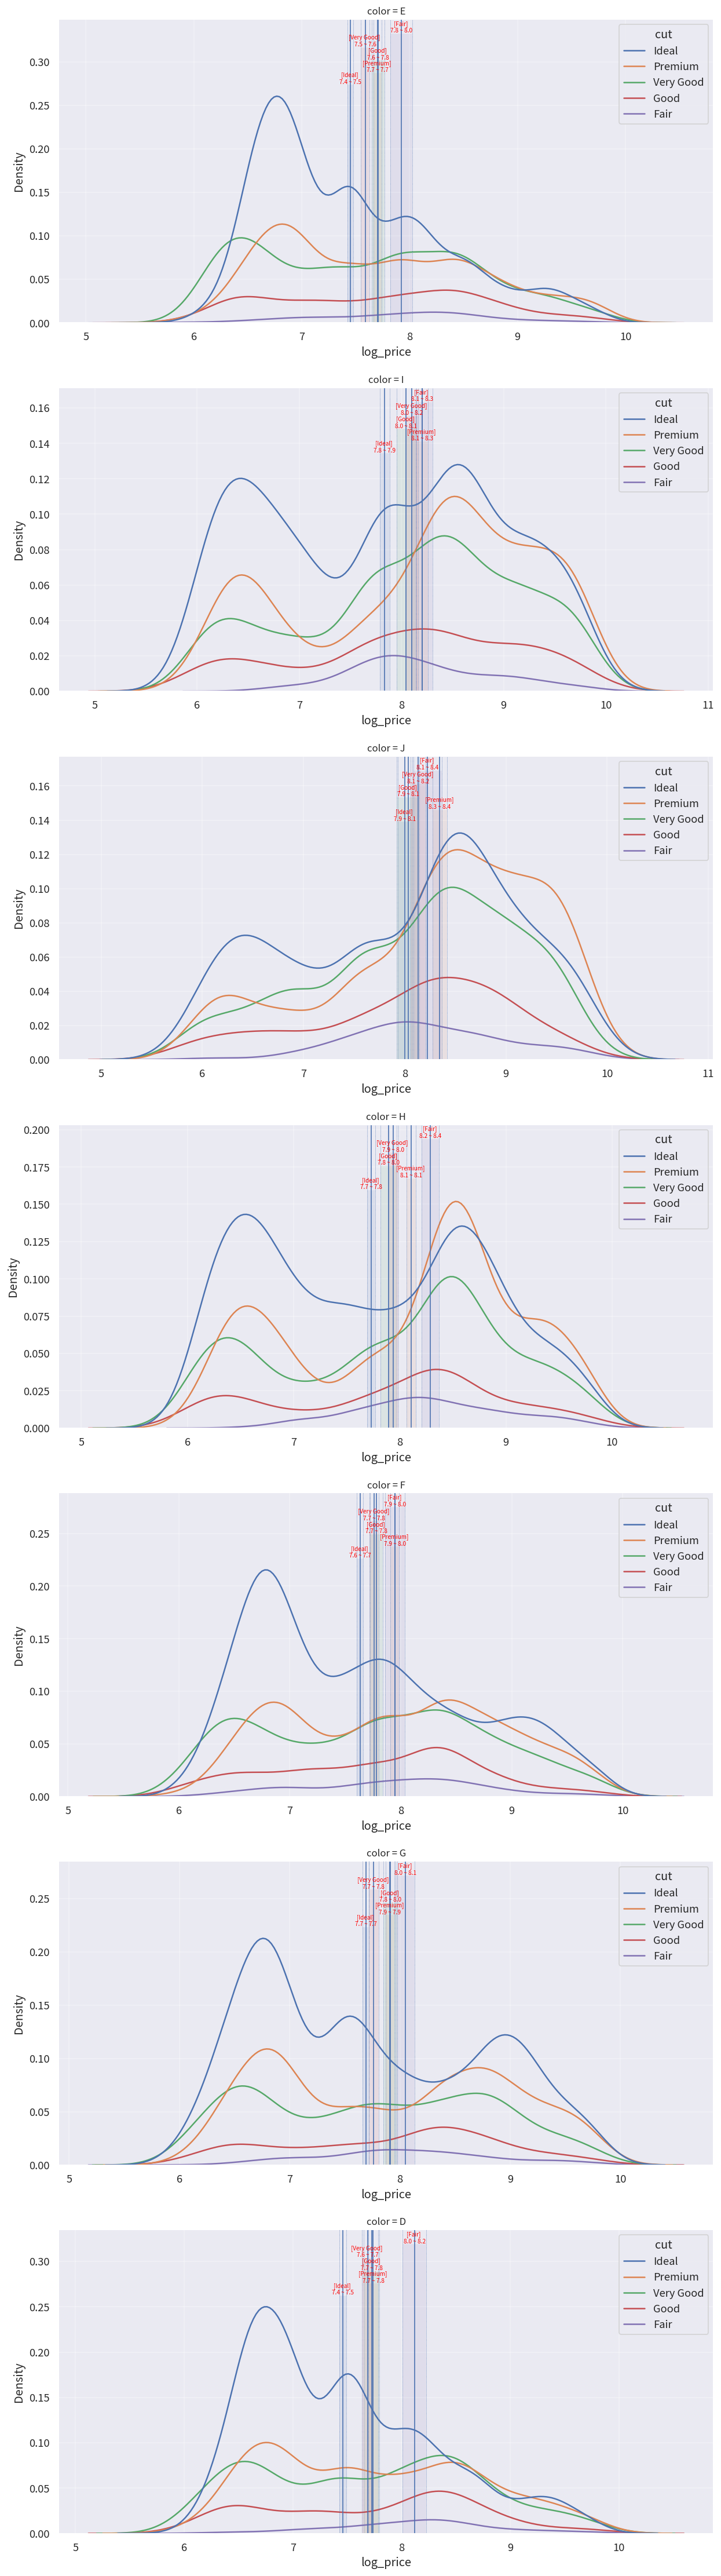

In [45]:
field = 'log_price'
group_field = 'color'
hue_field = 'cut'

# 시각화 할 필드만 원본 데이터에서 추출
data = df_log[[field, group_field, hue_field]]

group_values = data[group_field].unique()
group_count = len(group_values)
hue_values = data[hue_field].unique()

# 1) 그래프 초기화
rows = group_count                  # 그래프 행 수
cols = 1 # 그래프 열 수
width_px  = 1280 * cols             # 그래프 가로 크기
height_px = 640* rows              # 그래프 세로 크기
figsize = (width_px / my_dpi, height_px / my_dpi)

# ax 객체가 행,열 수에 따라서 리스트가 된다.
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기
for i, v in enumerate(group_values):
    temp = data[data[group_field] == v]
    sb.kdeplot(data=temp, x=field, hue=hue_field, ax=ax[i])
    ax[i].grid(True, alpha=0.3)
    ax[i].set_title('{0} = {1}'.format(group_field, v), fontsize=10, pad=5)

    for h in hue_values:
        temp_sub = temp[temp[hue_field] == h]
        
        # 신뢰구간
        max = temp_sub[field].max()                         # 최대값
        clevel = 0.95 # 신뢰수준
        dof = len(temp_sub[field]) -1 # 자유도
        sp_mean = temp_sub[field].mean()                    # 표본평균
        sp_std = temp_sub[field].std(ddof=1)                # 표본표준편차
        sp_std_error = sp_std / sqrt(len(temp_sub[field]))  # 표본표준오차
        
        cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)
        
        ax[i].axvline(cmin, linestyle=':', linewidth=0.5)
        ax[i].axvline(cmax, linestyle=':', linewidth=0.5)
        
        # 평균 표시
        ymin, ymax = ax[i].get_ylim()
        ax[i].fill_between([cmin, cmax], 0, ymax, alpha=0.1)
        ax[i].axvline(sp_mean, linestyle='-', linewidth=1)
        
        # 텍스트 그리기
        ax[i].text(x=(cmax-cmin)/2+cmin,
                y=ymax,
                s="[%s] \n%0.1f ~ %0.1f" % (h, cmin, cmax),
                horizontalalignment="center",
                verticalalignment="bottom",
                fontdict={"size": 6, "color": "red"})

# 4) 출력
plt.tight_layout()      
plt.show()              
# 여백 제거
# 그래프 화면 출력
plt.close()             
# 그래프 작업 종료

- 가설 검정의 가정 확인

In [46]:
data = df_log.copy()
xname = ['cut', 'color']
yname = 'log_price'

u1 = data[xname[0]].unique()
u2 = data[xname[1]].unique()
equal_var_fields = []
normal_dist = True
report = []

for i in u1:
    for j in u2:
        filtered_data = data[(data[xname[0]] == i) & (data[xname[1]] == j)][yname]
        equal_var_fields.append(filtered_data)
        s, p = normaltest(filtered_data)

        normalize = p > 0.05
        report.append({
            "field": "{0}, {1}".format(i, j),
            "statistic": s,
            "p-value": p,
            "result": normalize
        })
        normal_dist = normal_dist and normalize

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*equal_var_fields)
else:
    n = "Levene"
    s, p = levene(*equal_var_fields)

equal_var = p > 0.05

report.append({
    "field": n,
    "statistic": s,
    "p-value": p,
    "result": p > 0.05
})

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
"Ideal, E",310.796459,3.246434e-68,False
"Ideal, I",2722.982701,0.000000e+00,False
"Ideal, J",259.093013,5.478568e-57,False
"Ideal, H",4457.235323,0.000000e+00,False
"Ideal, F",525.637702,7.231415e-115,False
"Ideal, G",2430.270927,0.000000e+00,False
"Ideal, D",213.806360,3.737136e-47,False
"Premium, E",357.676767,2.145245e-78,False
"Premium, I",305.894351,3.766046e-67,False


- 분산분석 수행
분산분석이랑 사후분석은 완전 다른 분석......
등분산석이 꺠지면 분산분석은 못하는데 사후분석은 가능하다

In [47]:
xname = ['cut' , 'color']
yname = 'log_price'
data = df_log[xname + [yname]]

if equal_var:
    pg_anova = anova(data=data, dv=yname, between=xname)
else:
    pg_anova = welch_anova(data=data, dv=yname, between=xname)
display(pg_anova)
for idx in pg_anova.index:
    row = pg_anova.iloc[idx]
    source = row['Source']
    p_val = row['p-unc']

    if p_val <= 0.05:
      print(f"→ {source} 효과는 유의함. (대립가설 채택: p ≤ 0.05)")

    else:
      print(f"→ {source} 효과는 유의하지 않음. (귀무가설 채택: p > 0.05)")

ValueError: Length of values (2) does not match length of index (1)

In [ ]:
yname = 'log_price'

for xname in ['cut', 'color']:
    print(f"\n=== {xname} 기준 Welch ANOVA ===")
    pg_anova = pg.welch_anova(data=df_log, dv=yname, between=xname)
    display(pg_anova)

    for idx in pg_anova.index:
        row = pg_anova.iloc[idx]
        source = row['Source']
        p_val = row['p-unc']

        if p_val <= 0.05:
            print(f"→ {source} 효과는 유의함 (p = {p_val:.3g})")
        else:
            print(f"→ {source} 효과는 유의하지 않음 (p = {p_val:.3g})")



=== cut 기준 Welch ANOVA ===


,Source,ddof1,ddof2,F,p-unc,np2
0,cut,4,9549.055445,273.801562,3.537749e-223,0.018074


→ cut 효과는 유의함 (p = 3.54e-223)

=== color 기준 Welch ANOVA ===


,Source,ddof1,ddof2,F,p-unc,np2
0,color,6,18441.652409,236.137676,8.368844e-292,0.025752


→ color 효과는 유의함 (p = 8.37e-292)


In [ ]:
import pingouin as pg

pg_srh = pg.scheirer_ray_hare(
    data=df_log,
    dv='log_price',
    between=['cut', 'color']
)

print(pg_srh)


AttributeError: module 'pingouin' has no attribute 'scheirer_ray_hare'

<컷과 투명도>

- 컷 별 투명도에 따른 가격 비교

- 투명도 별 컷에 따른 가격 비교

### 미션8. 가격과 가장 가까운 물리적 변수는? 
연속형 변수들 사이의 상관관계를 계산해 보자.
price와 
carat, x, y, z, depth, 
table 중 어떤 변수가 가장 강한 관계를 보이는지 확인해 보고, 왜 그런 결
과가 나왔는지 팀의 언어로 설명해 보자.
이 과정에서 Pearson과 Spearman 중 어떤 상관계수가 더 적절한지도 함께 고민해 보자.

In [ ]:
# 이상치와 왜도 검정
data = df_log[['price', 'carat','x','y','z','depth','table']]
results = {}

for col in data.columns:
    temp = data[col].dropna()

    # 왜도 계산
    skew_original = temp.skew()

    # Z-score 기반 이상치 탐지 (|z| > 3)
    z_scores = zscore(temp)
    outlier_count = int(np.sum(np.abs(z_scores) > 3))

    # 로그 변환 후 왜도 계산 (음수 대비 +1)
    data_log = np.log1p(temp - temp.min() + 1)
    skew_log = data_log.skew()

    # 로그 변환 필요 여부 판단
    need_log = (abs(skew_original) > 1) and (abs(skew_log) < abs(skew_original))

    results[col] = {
        'original_skew': skew_original,
        'log_skew': skew_log,
        'outliers(|z|>3)': outlier_count,
        'log_recommended': need_log,
    }

# 결과 dataframe 변환
results_df = pd.DataFrame(results).T
display(results_df)

# 이상치 검정 결과
outlier_flag = len(results_df[results_df['outliers(|z|>3)'] > 0]) > 0


if outlier_flag:
    print("이상치가 발견되어 스피어만 상관계수 사용")
else:
    print("이상치가 발견되지 않아 피어슨 상관계수 사용")


,original_skew,log_skew,outliers(|z|>3),log_recommended
price,1.618477,-0.266753,1206,True
carat,1.116235,0.713777,436,True
x,0.398337,-0.012949,35,False
y,0.621299,-0.00097,30,False
z,1.582716,0.193918,35,True
depth,-0.081699,-2.177663,685,False
table,0.796782,0.159831,335,False


이상치가 발견되어 스피어만 상관계수 사용


> 이상치가 존재하므로 스피어만

In [ ]:
corr_matrix = df_log[['log_price','log_carat','x','y','z','depth','table']].corr(method='spearman')
corr_matrix

,log_price,log_carat,x,y,z,depth,table
log_price,1.000000,0.962886,0.963752,0.963213,0.958592,0.010060,0.171804
log_carat,0.962886,1.000000,0.996645,0.996033,0.994708,0.030197,0.194950
x,0.963752,0.996645,1.000000,0.997961,0.988378,-0.023165,0.202303
y,0.963213,0.996033,0.997961,1.000000,0.988140,-0.025135,0.195843
z,0.958592,0.994708,0.988378,0.988140,1.000000,0.103626,0.160302
depth,0.010060,0.030197,-0.023165,-0.025135,0.103626,1.000000,-0.245108
table,0.171804,0.194950,0.202303,0.195843,0.160302,-0.245108,1.000000


In [ ]:
spearman_list = ['log_carat','x','y','z','depth','table']

for i in spearman_list :
  spearman_r, spearman_p = spearmanr(df_log['log_price'], df_log[i])
  print('price 와',i,'의 상관성 확인: ',"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(spearman_r, spearman_p,  "대립" if spearman_p <=0.05 else "귀무"))

price 와 log_carat 의 상관성 확인:  statistic: 0.963, p-value: 0.000, 대립가설 채택
price 와 x 의 상관성 확인:  statistic: 0.964, p-value: 0.000, 대립가설 채택
price 와 y 의 상관성 확인:  statistic: 0.963, p-value: 0.000, 대립가설 채택
price 와 z 의 상관성 확인:  statistic: 0.959, p-value: 0.000, 대립가설 채택
price 와 depth 의 상관성 확인:  statistic: 0.010, p-value: 0.019, 대립가설 채택
price 와 table 의 상관성 확인:  statistic: 0.172, p-value: 0.000, 대립가설 채택


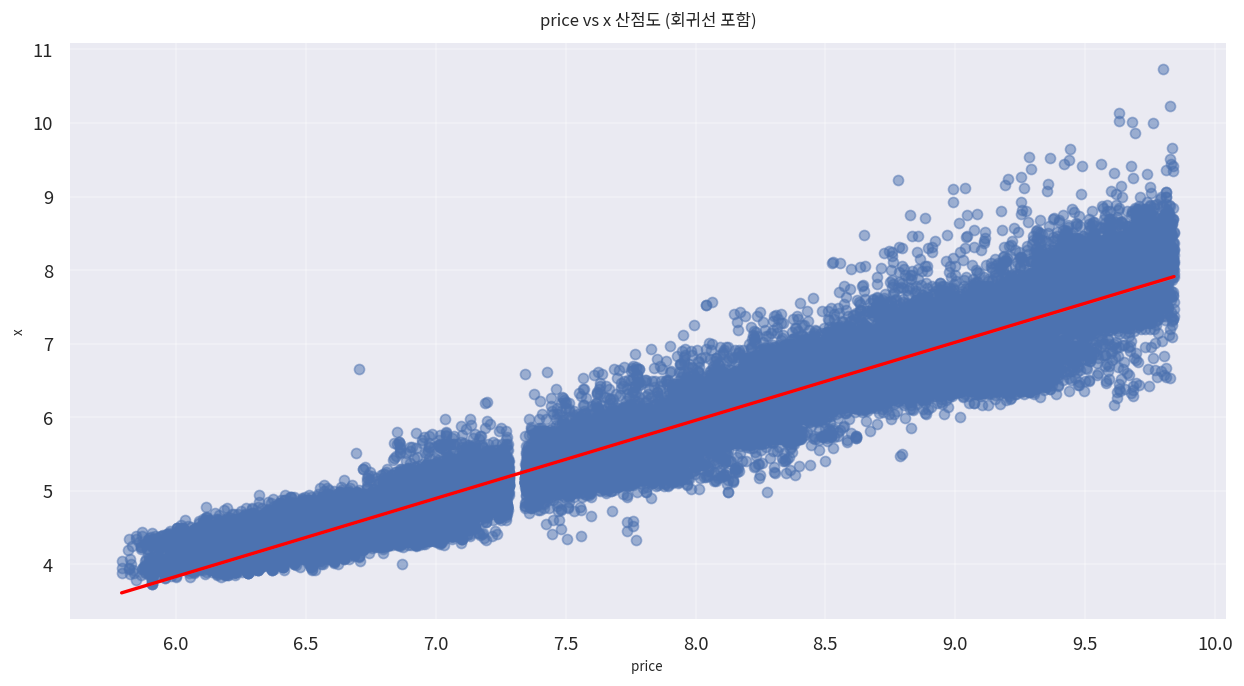

In [ ]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Scatter Plor 그리기
sb.regplot(data=df_log , x = 'log_price' , y='x' , scatter_kws = {'alpha':0.5}, line_kws ={'color':'red' , 'linewidth' : 2})

# 3) 그래프 꾸미기
ax.set_title('price vs x 산점도 (회귀선 포함)', fontsize=10, pad=10)
ax.set_xlabel('price ', fontsize=8)
ax.set_ylabel('x', fontsize=8)
ax.grid(True, alpha=0.3)           
# 배경 격자 표시

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


> price 와 carat , x, y 변수가 강한 상관관계를 띄고 있다

### 문제 9. 상관관계는 곧 원인일까?
상관분석 결과를 바탕으로 다음 질문에 답해 보자.
상관이 높다는 것은 무엇을 의미하는가?
이 결과를 그대로 “원인”이라고 말해도 될까?
분석 결과의 한계를 스스로 짚어보는 것이 이번 미션의 핵심이다.


### 문제 10. 가격을 설명하는 회귀 모형을 만들어보자
이제 지금까지 살펴본 변수들을 활용해 
log(price)를 종속변수로 하는 다중선형회귀모형을 만들어보자.
변수를 선택할 때는 “넣을 수 있어서”가 아니라 “설명하고 싶어서” 선택했는지 스스로 점검해 보자.
회귀계수 하나하나가 가격 구조를 어떻게 설명해 주는지 말로 풀어 써보자.

<다중선형회귀>

In [ ]:
df1 = df_log.copy()

yname = 'price'
x = df1.drop(yname, axis=1)
y = df1[yname]

print("y dtype:", y.dtype)
print("\nobject dtype columns in x:")
print(x.select_dtypes(include=['object']).columns)

print("\n전체 dtype:")
print(df1.dtypes)


y dtype: int64

object dtype columns in x:
Index([], dtype='object')

전체 dtype:
price           int64
carat         float64
cut          category
color        category
clarity      category
x             float64
y             float64
z             float64
depth         float64
table         float64
volume        float64
log_price     float64
log_carat     float64
dtype: object


In [ ]:
#테이블복사

df1 = df_log.copy()
df2 = df1.drop(['cut','color','clarity'],axis=1)

#종속변수 설정
yname = 'price'

#종속변수 외의 변수들 독립변수로 설정
x= df2.drop(yname,axis=1)
y=df2[yname]

#절편 더해주기
x_input = sm.add_constant(x)

fit = sm.OLS(y,x_input).fit()
tbl1 = fit.summary()
print(tbl1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 9.417e+04
Date:                Mon, 15 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:31:36   Log-Likelihood:            -4.4760e+05
No. Observations:               53919   AIC:                         8.952e+05
Df Residuals:                   53909   BIC:                         8.953e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.348e+04    589.496     39.830      0.0

In [ ]:
from pandas import DataFrame
from statsmodels.stats.outliers_influence import variance_inflation_factor

def ols_report(tbl, data):
    """
    OLS summary(tbl)와 데이터프레임(data)을 받아 회귀계수 표(rdf),
    모델 적합도 요약(result_report), 모델 보고 문장(model_report),
    변수별 보고 리스트(variable_reports)를 반환한다.

    Parameters
    ----------
    tbl : statsmodels.iolib.summary.Summary
        sm.OLS(...).fit().summary() 결과로 생성된 summary 객체.
    data : pandas.DataFrame
        종속변수와 독립변수를 모두 포함한 데이터프레임.

    Returns
    -------
    tuple
        (회귀계수 DataFrame, 적합도 요약 문자열, 모델 보고 문자열, 변수별 보고 리스트)
    """

    # 독립변수 이름(상수항 제외)
    xnames = [n for n in fit.model.exog_names if n != "const"]

    # 독립변수 부분 데이터 (VIF 계산용)
    indi_df = data.filter(xnames)

    # 독립변수 결과를 누적
    variables = []
    for i, v in enumerate(tbl.tables[1].data):
        # 한 행의 변수명 추출 후 목록에 있는지 확인
        name = v[0].strip()
        if name not in xnames:
            continue

        # VIF 계산을 위해 열 인덱스 조회
        j = list(indi_df.columns).index(name)
        vif = variance_inflation_factor(indi_df, j)

        # 유의확률과 별표 표시 함수
        p = float(v[4].strip())
        stars = lambda p: (
            "***" if p < 0.001 else
            "**"  if p < 0.01 else
            "*"   if p < 0.05 else
            ""
        )

        # 한 변수에 대한 보고 정보 추가
        variables.append({
            "종속변수": yname,                           # 종속변수 이름
            "독립변수": name,                            # 독립변수 이름
            "B": v[1].strip(),                           # 비표준화 회귀계수(B)
            "표준오차": v[2].strip(),                    # 계수 표준오차
            "Beta": float(fit.params[name])              # 표준화 회귀계수(β)
                    * (data[name].std(ddof=1)
                       / data[yname].std(ddof=1)),
            "t": "%s%s" % (v[3].strip(), stars(p)),      # t-통계량(+별표)
            "p-value": p,                                # 계수 유의확률
            "공차": 1 / vif,                             # 공차(Tolerance = 1/VIF)
            "vif": vif,                                  # 분산팽창계수
        })

    rdf = DataFrame(variables)

    # summary 표에서 적합도 정보를 key-value로 추출
    result_dict = {}
    for i in [0, 2]:
        for item in tbl.tables[i].data:
            n = len(item)
            for i in range(0, n, 2):
                key   = item[i].strip()[:-1]
                value = item[i+1].strip()
                if not key or not value:
                    continue
                result_dict[key] = value

    # 적합도 보고 문자열 구성
    result_report = (
        f"R({result_dict['R-squared']}), "
        f"R^2({result_dict['Adj. R-squared']}), "
        f"F({result_dict['F-statistic']}), "
        f"유의확률({result_dict['Prob (F-statistic)']}), "
        f"Durbin-Watson({result_dict['Durbin-Watson']})"
    )

    # 모형 보고 문장 구성
    tpl = (
        "%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, "
        "이 회귀모형은 통계적으로 %s"
        "(F(%s,%s) = %s, p %s 0.05)."
    )
    model_report = tpl % (
        rdf['종속변수'][0],
        ",".join(list(rdf['독립변수'])),
        "유의하다"
        if float(result_dict['Prob (F-statistic)']) <= 0.05
        else "유의하지 않다",
        result_dict['Df Model'],
        result_dict['Df Residuals'],
        result_dict['F-statistic'],
        "<" if float(result_dict['Prob (F-statistic)']) <= 0.05 else ">"
    )

    # 변수별 보고 문장 리스트 구성
    variable_reports = []
    s = "%s의 회귀계수는 %s(p %s 0.05)로, %s에 대하여 %s 예측변인인 것으로 나타났다."
    for i in rdf.index:
        row = rdf.iloc[i]
        variable_reports.append(
            s % (
                row['독립변수'],
                row['B'],
                "<" if float(row['p-value']) < 0.05 else ">",
                row['종속변수'],
                '유의미한'
                if float(row['p-value']) < 0.05
                else '유의하지 않은'
            )
        )

    return rdf, result_report, model_report, variable_reports


In [ ]:

yname = 'log_price'
x = df2.drop(yname, axis=1)
y = df2[yname]
x_input = sm.add_constant(x)
fit = sm.OLS(y, x_input).fit()
tbl2 = fit.summary()

rdf, r, m, v = ols_report(tbl2, df2)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,price,0.0001,5.07e-07,0.504979,253.328***,0.0,0.070965,14.091426
1,log_price,carat,0.8175,0.069,0.381942,11.891***,0.0,0.000170,5869.316476
2,log_price,x,0.7316,0.014,0.807602,51.653***,0.0,0.000215,4658.899615
3,log_price,y,0.5468,0.010,0.602258,53.897***,0.0,0.000181,5510.600955
4,log_price,z,0.5832,0.010,0.403915,55.939***,0.0,0.000400,2500.626952
5,log_price,depth,0.0080,0.001,0.011311,8.954***,0.0,0.000510,1961.936361
6,log_price,table,-0.0057,0.000,-0.012607,-15.468***,0.0,0.001506,663.963363
7,log_price,volume,-0.0207,0.000,-1.564541,-61.737***,0.0,0.000240,4171.846769
8,log_price,log_carat,-0.5360,0.132,-0.129391,-4.048***,0.0,0.000222,4513.105352


log_price에 대하여 price,carat,x,y,z,depth,table,volume,log_carat로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(9,53909) = 2.075e+05, p < 0.05).


- carat 삭제

In [ ]:
df3=df2.copy()
df3=df3.drop('carat' ,axis=1)

yname = 'log_price'
x = df3.drop(yname, axis=1)
y = df3[yname]
x_input = sm.add_constant(x)
fit = sm.OLS(y, x_input).fit()
tbl2 = fit.summary()

rdf, r, m, v = ols_report(tbl2, df2)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,price,0.0001,5e-07,0.500852,254.823***,0.0,0.071246,14.035832
1,log_price,x,0.6807,0.014,0.751423,50.352***,0.0,0.000219,4557.209281
2,log_price,y,0.4487,0.006,0.494256,75.835***,0.0,0.000449,2225.390867
3,log_price,z,0.4817,0.006,0.333641,80.317***,0.0,0.001267,789.120129
4,log_price,depth,0.0083,0.001,0.011681,9.237***,0.0,0.001403,712.947318
5,log_price,table,-0.0055,0.000,-0.012145,-14.898***,0.0,0.001710,584.780734
6,log_price,volume,-0.0169,8.28e-05,-1.272498,-203.485***,0.0,0.004520,221.243476
7,log_price,log_carat,0.8104,0.069,0.195622,11.792***,0.0,0.001051,951.151659


log_price에 대하여 price,x,y,z,depth,table,volume,log_carat로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(8,53910) = 2.328e+05, p < 0.05).


-log carat 삭제

In [ ]:
df4=df3.copy()
df4=df4.drop('log_carat' ,axis=1)

yname = 'log_price'
x = df4.drop(yname, axis=1)
y = df4[yname]
x_input = sm.add_constant(x)
fit = sm.OLS(y, x_input).fit()
tbl2 = fit.summary()

rdf, r, m, v = ols_report(tbl2, df2)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,price,0.0001,4.93e-07,0.504910,260.584***,0.0,0.071272,14.030722
1,log_price,x,0.8204,0.007,0.905638,125.829***,0.0,0.000381,2621.961897
2,log_price,y,0.4433,0.006,0.488258,75.048***,0.0,0.000465,2152.047228
3,log_price,z,0.4703,0.006,0.325690,79.356***,0.0,0.001315,760.185636
4,log_price,depth,0.0157,0.001,0.022237,24.865***,0.0,0.001684,593.914076
5,log_price,table,-0.0042,0.000,-0.009247,-11.881***,0.0,0.001971,507.437960
6,log_price,volume,-0.0162,5.93e-05,-1.220940,-272.735***,0.0,0.007216,138.581539


log_price에 대하여 price,x,y,z,depth,table,volume로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(7,53911) = 2.653e+05, p < 0.05).


In [ ]:
df5=df4.copy()
df5=df5.drop('price' ,axis=1)

yname = 'log_price'
x = df5.drop(yname, axis=1)
y = df5[yname]
x_input = sm.add_constant(x)
fit = sm.OLS(y, x_input).fit()
tbl2 = fit.summary()

rdf, r, m, v = ols_report(tbl2, df2)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,x,0.8980,0.010,0.991393,91.732***,0.0,0.000383,2611.895695
1,log_price,y,0.3124,0.009,0.344111,35.315***,0.0,0.000467,2141.190952
2,log_price,z,0.2446,0.009,0.169417,27.759***,0.0,0.001363,733.602483
3,log_price,depth,0.0118,0.001,0.016683,12.414***,0.0,0.001712,584.269369
4,log_price,table,-0.0130,0.001,-0.028593,-24.554***,0.0,0.001976,506.081234
5,log_price,volume,-0.0072,7.26e-05,-0.544079,-99.274***,0.0,0.010844,92.217099


log_price에 대하여 x,y,z,depth,table,volume로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(6,53912) = 1.320e+05, p < 0.05).


- volume 삭제

In [ ]:
df6=df5.copy()
df6=df6.drop('volume' ,axis=1)

yname = 'log_price'
x = df6.drop(yname, axis=1)
y = df6[yname]
x_input = sm.add_constant(x)
fit = sm.OLS(y, x_input).fit()
tbl2 = fit.summary()

rdf, r, m, v = ols_report(tbl2, df2)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,x,0.7051,0.010,0.778424,67.572***,0.0,0.000393,2542.197601
1,log_price,y,0.1400,0.009,0.154235,14.843***,0.0,0.000480,2084.012727
2,log_price,z,0.0508,0.009,0.035153,5.431***,0.0,0.001540,649.205190
3,log_price,depth,0.0099,0.001,0.014019,9.593***,0.0,0.002186,457.551835
4,log_price,table,-0.0112,0.001,-0.024705,-19.518***,0.0,0.002083,480.054428


log_price에 대하여 x,y,z,depth,table로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(5,53913) = 1.323e+05, p < 0.05).


- x 삭제

In [ ]:
df7=df6.copy()
df7=df7.drop('x' ,axis=1)

yname = 'log_price'
x = df7.drop(yname, axis=1)
y = df7[yname]
x_input = sm.add_constant(x)
fit = sm.OLS(y, x_input).fit()
tbl2 = fit.summary()

rdf, r, m, v = ols_report(tbl2, df2)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,y,0.6698,0.005,0.737740,122.558***,0.0,0.001822,548.845471
1,log_price,z,0.3299,0.009,0.228513,37.794***,0.0,0.001895,527.740063
2,log_price,depth,-0.0038,0.001,-0.005333,-3.573***,0.0,0.002279,438.869182
3,log_price,table,-0.0078,0.001,-0.017266,-13.148***,0.0,0.002177,459.450803


log_price에 대하여 y,z,depth,table로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(4,53914) = 1.514e+05, p < 0.05).


- z 삭제

In [ ]:
df8=df7.copy()
df8=df8.drop('z' ,axis=1)

yname = 'log_price'
x = df8.drop(yname, axis=1)
y = df8[yname]
x_input = sm.add_constant(x)
fit = sm.OLS(y, x_input).fit()
tbl2 = fit.summary()

rdf, r, m, v = ols_report(tbl2, df2)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,y,0.8718,0.001,0.960247,755.478***,0.0,0.035242,28.375029
1,log_price,depth,0.0163,0.001,0.023044,17.635***,0.0,0.002577,387.989002
2,log_price,table,-0.0072,0.001,-0.015955,-11.996***,0.0,0.002435,410.606519


log_price에 대하여 y,depth,table로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(3,53915) = 1.961e+05, p < 0.05).


- table 삭제

In [ ]:
df9=df8.copy()
df9=df9.drop('table' ,axis=1)

yname = 'log_price'
x = df9.drop(yname, axis=1)
y = df9[yname]
x_input = sm.add_constant(x)
fit = sm.OLS(y, x_input).fit()
tbl2 = fit.summary()

rdf, r, m, v = ols_report(tbl2, df2)
display(rdf)
print(m)

,종속변수,독립변수,B,표준오차,Beta,t,p-value,공차,vif
0,log_price,y,0.8691,0.001,0.957369,765.989***,0.0,0.037317,26.797727
1,log_price,depth,0.0196,0.001,0.027682,22.149***,0.0,0.037317,26.797727


log_price에 대하여 y,depth로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(2,53916) = 2.934e+05, p < 0.05).



크기는 전혀 관련이 없고...
연속형 변수를 범주형으로....\\

XYZ TABLE 크기 DEPTH 크기
> 실제로 크기가 영향이 전혀 없음

다 CARAT 이야

연속형 데이터로 분석하면 VIF 겁나 큼
남는게 색상 컷 투명도 

얘네를 명목형이니까 더미로 만들어서 떄려야 하는데


명목형 변수 더미로 해서 넣고
명목형을 사용하ㅡㄴ데 있어서 무조건 사용이 아니고


세공 종류에 따라 가격 평균에 차이가 있는ㄴ지 확인하고
유의미한 차이가 있으면 넣어준다

>명목형 변수별로 ANOVA 분산 분석 해서



평균에 영향을 주는 더미변수를 선정해서 넣으면
색상, 투명도,CARAT 정도....


> 명목형 변수 행들링 하는거에 달린 문제임



명목형 변수 별로 평균 차이 확인해보기!!